<a href="https://colab.research.google.com/github/PrashantBhatt072/hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Statement**
 Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

 This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.

 <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# **Importance of Hotel booking analysis**

## Businesses around the world are waking up to the importance of data analytics. Getting the right insights gives you an advantage in a competitive business environment. The hotel industry is no different.

## Data analytics in the hotel industry is key to marketing strategy, building customer loyalty, and enhancing productivity. It enables hotels to personalize experiences for their guests, introduce better hotel pricing strategies, and expand their customer base. Here are some ways in which data analytics makes a positive impact on the hotel industry.


*   ## Customer Data Analysis & Market Segmentation
*   ## Real-Time Data and Hotel Pricing Strategies
*    ## Managing Hotel Booking Channels
*   ## Inventory Management
*   ## Demand Forecasting



#**Exploration of Dataset**

In [1]:
# Import all required libraries
import pandas as pd 
import numpy as np 
from datetime import datetime
from datetime import date

In [2]:
# let's mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Now I am going to initialize a DataFrame known as 'hotel_df' with the given csv file 'Hotel booking'
hotel_df = pd.read_csv('/content/drive/MyDrive/Hotel booking analysis - Prashant/Hotel Bookings.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# let's check what kind of data it has
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
# ok let's check what are the columns and their entries
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# let's check what are the hotels we have in our data set. 
hotel_df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

 So, there are only two types of hotels:

*    Resort hotel
*    City hotel



In [11]:
# let's check what are the market segment we have in our data set. 
hotel_df.market_segment.unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

 So, we have eight unique market segments from where customers are coming.

In [12]:
# let's check what are the meal types we have in our data set.
hotel_df.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

 These are the four types of meal in the given data:


*    SC means self-catering (no meals are included).
*    BB means bed and breakfast., in which breakfast is served in room itself.
*  HB means half board, in which breakfast and dinner are included.
*  FB means full board, in which breakfast, lunch and dinner are included. 


In [13]:
# let's check what are the country we have in our data set.
hotel_df.country.unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [15]:
# let's check number of countries we have in our data set.
hotel_df.country.nunique()

177

## so, we have data of 177 countries coded in short form.
## Remembering all the countries name along with its short form is a difficult task. 
## Thus, we are porviding list of countries and their short forms so that anyone can refer whenever required.

## Name of the countries according to their country codes:


*   ABW Aruba
* AFG Afghanistan
* AGO Angola
* AIA Anguilla    
* ALA Åland Islands
* ALB Albania
* AND Andorra
* ARE United Arab Emirates
* ARG Argentina
* ARM Armenia
* ASM American Samoa
* ATA Antarctica
* ATF French Southern Territories
* ATG Antigua and Barbuda
* AUS Australia
* AUT Austria
* AZE Azerbaijan
* BDI Burundi
* BEL Belgium
* BEN Benin
* BES Bonaire, Sint Eustatius and Saba
* BFA Burkina Faso
* BGD Bangladesh
* BGR Bulgaria
* BHR Bahrain
* BHS Bahamas
* BIH Bosnia and Herzegovina
* BLM Saint Barthélemy
* BLR Belarus
* BLZ Belize
* BMU Bermuda
* BOL Bolivia, Plurinational State of
* BRA Brazil
* BRB Barbados
* BRN Brunei Darussalam
* BTN Bhutan
* BVT Bouvet Island
* BWA Botswana
* CAF Central African Republic
* CAN Canada
* CCK Cocos (Keeling) Islands
* CHE Switzerland
* CHL Chile
* CHN China
* CIV Côte d'Ivoire
* CMR Cameroon
* COD Congo, the Democratic Republic of the
* COG Congo
* COK Cook Islands
* COL Colombia
* COM Comoros
* CPV Cabo Verde
* CRI Costa Rica
* CUB Cuba
* CUW Curaçao
* CXR Christmas Island
* CYM Cayman Islands
* CYP Cyprus
* CZE Czech Republic
* DEU Germany
* DJI Djibouti
* DMA Dominica
* DNK Denmark
* DOM Dominican Republic
* DZA Algeria
* ECU Ecuador
* EGY Egypt
* ERI Eritrea
* ESH Western Sahara
* ESP Spain
* EST Estonia
* ETH Ethiopia
* FIN Finland
* FJI Fiji
* FLK Falkland Islands (Malvinas)
* FRA France
* FRO Faroe Islands
* FSM Micronesia, Federated States of
* GAB Gabon
* GBR United Kingdom
* GEO Georgia
* GGY Guernsey
* GHA Ghana
* GIB Gibraltar
* GIN Guinea
* GLP Guadeloupe
* GMB Gambia
* GNB Guinea-Bissau
* GNQ Equatorial Guinea
* GRC Greece
* GRD Grenada
* GRL Greenland
* GTM Guatemala
* GUF French Guiana
* GUM Guam
* GUY Guyana
* HKG Hong Kong
* HMD Heard Island and McDonald Islands
* HND Honduras
* HRV Croatia
* HTI Haiti
* HUN Hungary
* IDN Indonesia
* IMN Isle of Man
* IND India
* IOT British Indian Ocean Territory
* IRL Ireland
* IRN Iran, Islamic Republic of
* IRQ Iraq
* ISL Iceland
* ISR Israel
* ITA Italy
* JAM Jamaica
* JEY Jersey
* JOR Jordan
* JPN Japan
* KAZ Kazakhstan
* KEN Kenya
* KGZ Kyrgyzstan
* KHM Cambodia
* KIR Kiribati
* KNA Saint Kitts and Nevis
* KOR Korea
* KWT Kuwait
* LAO Lao People's Democratic Republic
* LBN Lebanon
* LBR Liberia
* LBY Libya
* LCA Saint Lucia
* LIE Liechtenstein
* LKA Sri Lanka
* LSO Lesotho
* LTU Lithuania
* LUX Luxembourg
* LVA Latvia
* MAC Macao
* MAF Saint Martin (French part)
* MAR Morocco
* MCO Monaco
* MDA Moldova, Republic of
* MDG Madagascar
* MDV Maldives
* MEX Mexico
* MHL Marshall Islands
* MKD Macedonia, the former Yugoslav Republic of
* MLI Mali
* MLT Malta
* MMR Myanmar
* MNE Montenegro
* MNG Mongolia
* MNP Northern Mariana Islands
* MOZ Mozambique
* MRT Mauritania
* MSR Montserrat
* MTQ Martinique
* MUS Mauritius
* MWI Malawi
* MYS Malaysia
* MYT Mayotte
* NAM Namibia
* NCL New Caledonia
* NER Niger
* NFK Norfolk Island
* NGA Nigeria
* NIC Nicaragua
* NIU Niue
* NLD Netherlands
* NOR Norway
* NPL Nepal
* NRU Nauru
* NZL New Zealand
* OMN Oman
* PAK Pakistan
* PAN Panama
* PCN Pitcairn
* PER Peru
* PHL Philippines
* PLW Palau
* PNG Papua New Guinea
* POL Poland
* PRI Puerto Rico
* PRK Korea, Democratic People's Republic of Korea
* PRT Portugal
* PRY Paraguay
* PSE Palestine
* PYF French Polynesia
* QAT Qatar
* REU Réunion
* ROU Romania
* RUS Russian Federation
* RWA Rwanda
* SAU Saudi Arabia
* SDN Sudan
* SEN Senegal
* SGP Singapore 
* SGS South Georgia and the South Sandwich Islands
* SHN Saint Helena, Ascension and Tristan da Cunha
* SJM Svalbard and Jan Mayen
* SLB Solomon Islands
* SLE Sierra Leone
* SLV El Salvador
* SMR San Marino
* SOM Somalia
* SPM Saint Pierre and Miquelon
* SRB Serbia
* SSD South Sudan
* STP Sao Tome and Principe
* SUR Suriname
* SVK Slovakia
* SVN Slovenia
* SWE Sweden
* SWZ Swaziland
* SXM Sint Maarten (Dutch part)
* SYC Seychelles
* SYR Syrian Arab Republic
* TCA Turks and Caicos Islands
* TCD Chad
* TGO Togo
* THA Thailand
* TJK Tajikistan
* TKL Tokelau
* TKM Turkmenistan
* TLS Timor-Leste
* TON Tonga
* TTO Trinidad and Tobago
* TUN Tunisia
* TUR Turkey
* TUV Tuvalu
* TWN Taiwan, Province of China
* TZA Tanzania, United Republic of
* UGA Uganda
* UKR Ukraine
* UMI United States Minor Outlying Islands
* URY Uruguay
* USA United States of America
* UZB Uzbekistan
* VAT Holy See (Vatican City State)
* VCT Saint Vincent and the Grenadines
* VEN Venezuela, Bolivarian Republic of
* VGB Virgin Islands, British
* VIR Virgin Islands, U.S.
* VNM Viet Nam
* VUT Vanuatu
* WLF Wallis and Futuna
* WSM Samoa
* YEM Yemen
* ZAF South Africa
* ZMB Zambia
* ZWE Zimbabw



# **Handling NaN values**

 Data in real world are rarely clean and homogeneous. Data can either be missing during data extraction or collection.

 Missing values need to be handled because they reduce the quality for any of our performance metric. It can also lead to wrong prediction or classification and can also cause a high bias for any given model being used .

 There are several options for handling missing values each with its own PROS and CONS. However, the choice of what should be done is largely dependent on the nature of our data and the missing values. Below is a summary highlight of several options we have for handling missing values.
*  Drop missing values
*  Fill missing values with test statistic
*  Predict missing value with a machine learning alogrithm

In [16]:
# Let's check again the information
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

 Here we can observe that four columns have some null values, let's calculate the total percentage of null values:

 Total no. of  rows / data = 119390

 In column 'children' we have four (119390 - 119386 = 4) null values.

 In column 'country' we have 488 (119390 - 118902  = 488) null values.

 In column 'agent' we have 16340 (119390 - 103050  = 16340) null values.

 In column 'company' we have 112593 (119390 - 6797  = 112593) null values.

 Here we can observe that in 'company' column 94.3%  values are null, hence we can not perform any analysis on 'country' data, hence it will be better if we drop this column.

 Let's do this !

In [17]:
# dropping the country column

hotel_df.drop(['company'], axis = 1, inplace= True)

In [18]:
# now again check the info
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [19]:
# Now let's count rows which have atleast one missing(null) values in some column:

sum([True for idx,row in hotel_df.iterrows() if any(row.isnull())])

16496

 So, total rows which has null values = 16496

 total percentage of rows which has null values = 13.6 %

 Here we found that rows which has NaN values are only 13.6 % of total rows, which is very less, hence we can drop that rows which has NaN value(s) in it.

 Let's do this !

In [20]:
# Let's use .dropna() function to delete rows with NaN values
hotel_df.dropna(axis=0, how="any", thresh=None, subset=None, inplace=True)

In [21]:
# again check the DataFrame
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102894 entries, 3 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           102894 non-null  object 
 1   is_canceled                     102894 non-null  int64  
 2   lead_time                       102894 non-null  int64  
 3   arrival_date_year               102894 non-null  int64  
 4   arrival_date_month              102894 non-null  object 
 5   arrival_date_week_number        102894 non-null  int64  
 6   arrival_date_day_of_month       102894 non-null  int64  
 7   stays_in_weekend_nights         102894 non-null  int64  
 8   stays_in_week_nights            102894 non-null  int64  
 9   adults                          102894 non-null  int64  
 10  children                        102894 non-null  float64
 11  babies                          102894 non-null  int64  
 12  meal            

 Yes! Now we can observe above that every column has equal number of non-null values that means all NaN values are now eliminated.

 Now, We have three columns 'arrival_date_year' , 'arrival_date_month' and 'arrival_date_day_of_month' which gives the information of check-in date.

Let's make one new column which will take check-in date.

In [22]:
# Here adding the above mentioned three mentioned column I am converting checkin date as string dtype and pushing these datas in a new column called "check_in_date"

hotel_df["check_in_date"] = hotel_df["arrival_date_year"].astype(str) + '-' + hotel_df["arrival_date_month"] + '-' + hotel_df["arrival_date_day_of_month"].astype(str)


In [23]:
# Converting date string to datetime dtype

hotel_df['check_in_date'] = hotel_df['check_in_date'].apply(lambda x : datetime.strptime(x,'%Y-%B-%d'))

In [24]:
# Let's check the data
# The head() function is used to get the first n rows. 
# This function returns the first n rows for the object based on position. 
# It is useful for quickly testing if your object has the right type of data in it.

hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,check_in_date
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,2015-07-03,2015-07-01
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06,2015-07-01


In [25]:
# Let's check info to see whether the dtype of column "check_in_date" has changed to 'datetime64' or not! 

hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102894 entries, 3 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           102894 non-null  object        
 1   is_canceled                     102894 non-null  int64         
 2   lead_time                       102894 non-null  int64         
 3   arrival_date_year               102894 non-null  int64         
 4   arrival_date_month              102894 non-null  object        
 5   arrival_date_week_number        102894 non-null  int64         
 6   arrival_date_day_of_month       102894 non-null  int64         
 7   stays_in_weekend_nights         102894 non-null  int64         
 8   stays_in_week_nights            102894 non-null  int64         
 9   adults                          102894 non-null  int64         
 10  children                        102894 non-null  float64

##**Yeah, now the dataframe "hotel_df" is ready to be analyzed.** 

# **BOOKING ANALYSIS**



##Monthly booking analysis.

Under this block,we are going to tace the number of bookings for every month each year for both hotels.

In [26]:
#Find the number of bookings Month wise
booking_list_month_wise_city= []
booking_list_month_wise_resort= []
list_of_months = []

for month in ['July', 'August', 'September', 'October', 'November', 'December']:
  num_of_booking_city = hotel_df.loc[(hotel_df["hotel"] == 'City Hotel') & (hotel_df["arrival_date_year"] == 2015) & (hotel_df["arrival_date_month"] == month )]['adr'].count()
  num_of_booking_resort = hotel_df.loc[(hotel_df["hotel"] == 'Resort Hotel') & (hotel_df["arrival_date_year"] == 2015) & (hotel_df["arrival_date_month"] == month )]['adr'].count()
  booking_list_month_wise_city.append(num_of_booking_city)
  booking_list_month_wise_resort.append(num_of_booking_resort)
  list_of_months.append(month + ' 2015')
    

for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']:
  num_of_booking_city = hotel_df.loc[(hotel_df["hotel"] == 'City Hotel') & (hotel_df["arrival_date_year"] == 2016) & (hotel_df["arrival_date_month"] == month )]['adr'].count()
  num_of_booking_resort = hotel_df.loc[(hotel_df["hotel"] == 'Resort Hotel') & (hotel_df["arrival_date_year"] == 2016) & (hotel_df["arrival_date_month"] == month )]['adr'].count()
  booking_list_month_wise_city.append(num_of_booking_city)
  booking_list_month_wise_resort.append(num_of_booking_resort)
  list_of_months.append(month + ' 2016')


for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']:
  num_of_booking_city = hotel_df.loc[(hotel_df["hotel"] == 'City Hotel') & (hotel_df["arrival_date_year"] == 2017) & (hotel_df["arrival_date_month"] == month )]['adr'].count()
  num_of_booking_resort = hotel_df.loc[(hotel_df["hotel"] == 'Resort Hotel') & (hotel_df["arrival_date_year"] == 2017) & (hotel_df["arrival_date_month"] == month )]['adr'].count()
  booking_list_month_wise_city.append(num_of_booking_city)
  booking_list_month_wise_resort.append(num_of_booking_resort)
  list_of_months.append(month + ' 2017')


In [27]:
#let's check contents of lists.

print(booking_list_month_wise_city)
print(booking_list_month_wise_resort)
print(list_of_months)

[1374, 2186, 3234, 3089, 1053, 1425, 1181, 1945, 2728, 3342, 3259, 3696, 2915, 3170, 3599, 3953, 2459, 2236, 1917, 2232, 3015, 3518, 3949, 3467, 3274, 2965]
[1192, 1165, 1312, 1075, 799, 939, 594, 1102, 1306, 1508, 1436, 1164, 1254, 1518, 1266, 1320, 1085, 1020, 854, 1166, 1083, 1378, 1443, 1476, 1590, 1668]
['July 2015', 'August 2015', 'September 2015', 'October 2015', 'November 2015', 'December 2015', 'January 2016', 'February 2016', 'March 2016', 'April 2016', 'May 2016', 'June 2016', 'July 2016', 'August 2016', 'September 2016', 'October 2016', 'November 2016', 'December 2016', 'January 2017', 'February 2017', 'March 2017', 'April 2017', 'May 2017', 'June 2017', 'July 2017', 'August 2017']


In [28]:
# making a new dataframe

d= {'months_of_year': list_of_months,'number_of_booking_city_hotel': booking_list_month_wise_city, 'number_of_booking_resort_hotel': booking_list_month_wise_resort}
new_df = pd.DataFrame(d)
new_df.head(30)

,months_of_year,number_of_booking_city_hotel,number_of_booking_resort_hotel
0,July 2015,1374,1192
1,August 2015,2186,1165
2,September 2015,3234,1312
3,October 2015,3089,1075
4,November 2015,1053,799
5,December 2015,1425,939
6,January 2016,1181,594
7,February 2016,1945,1102
8,March 2016,2728,1306
9,April 2016,3342,1508


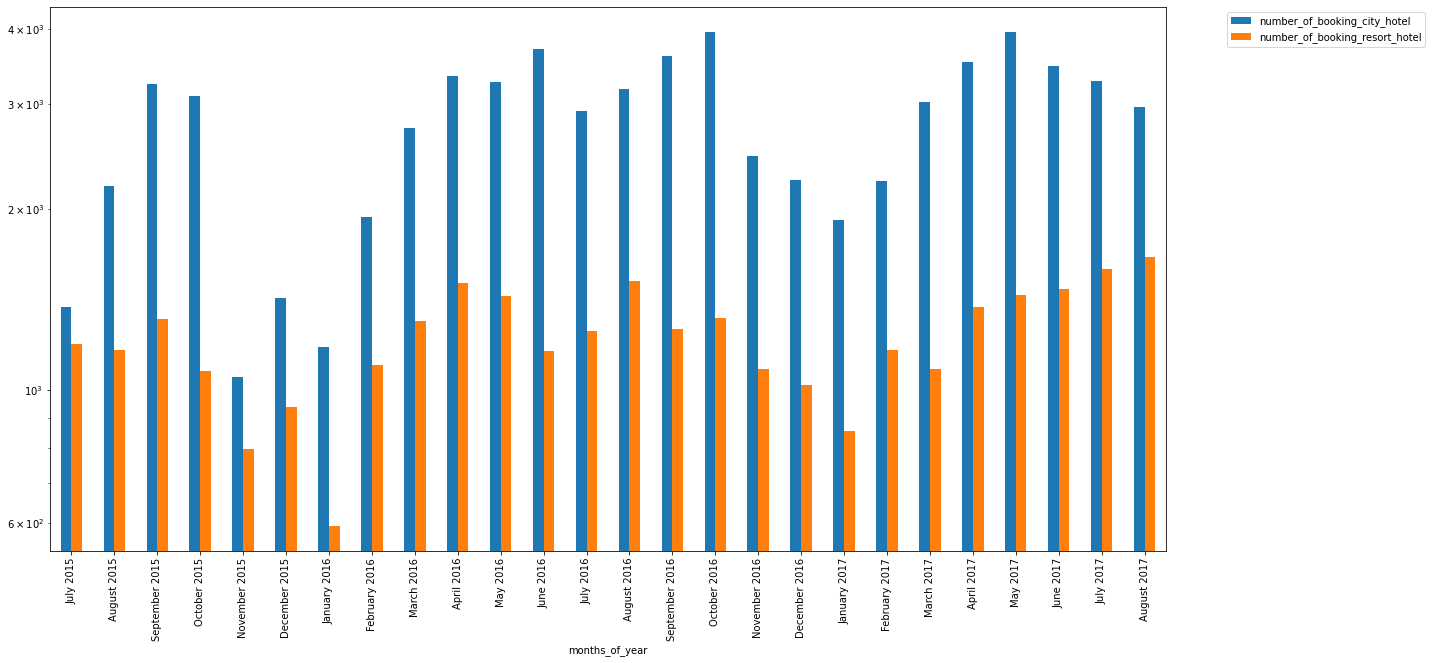

In [29]:
# plotting the graph for resort hotel
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (20, 10)  

new_df.plot.bar(x='months_of_year', logy=True)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

###**CONCLUSION:**

 After tracing the data ,we observe that for both the hotels,

 booking start increasing from spring to summer season and then decrease till winter season.

 However , comparing the magnitude of booking we see that city hotel has always scored higher inspite of the trend of booking being same.

## Analysis of number of bookings through each market segment.

We have seven distinct market segment in our data. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”.

 Under this segment we are going to analyse traffic from each market segment for  both the  hotels.

In [30]:
# creating new data frame according to market segment having columns  ["hotel" , "market_segment", "no_of_bookings" ]

market_segment_df=hotel_df.groupby(['hotel','market_segment'])['market_segment'].count().reset_index(name='no_of_bookings')

In [31]:
#let's check what kind of data it has:
market_segment_df.head(28)

,hotel,market_segment,no_of_bookings
0,City Hotel,Aviation,25
1,City Hotel,Complementary,53
2,City Hotel,Corporate,311
3,City Hotel,Direct,3655
4,City Hotel,Groups,12072
5,City Hotel,Offline TA/TO,16519
6,City Hotel,Online TA,38546
7,Resort Hotel,Complementary,50
8,Resort Hotel,Corporate,381
9,Resort Hotel,Direct,2927


In [32]:
# Now we are separating the data into new dataframe for city hotel
market_segment_city_hotel_df = market_segment_df.loc[ (market_segment_df["hotel"] == "City Hotel") , ["market_segment", "no_of_bookings"]]

In [33]:
market_segment_city_hotel_df.head(20)

,market_segment,no_of_bookings
0,Aviation,25
1,Complementary,53
2,Corporate,311
3,Direct,3655
4,Groups,12072
5,Offline TA/TO,16519
6,Online TA,38546


In [34]:
# Let's rename the column to specify that data is for city hotel
market_segment_city_hotel_df.rename(columns={'no_of_bookings': 'no_of_booking_for_city_hotel'}, index={'ONE': 'Row_1'}, inplace=True)


In [35]:
market_segment_city_hotel_df.head(20)

,market_segment,no_of_booking_for_city_hotel
0,Aviation,25
1,Complementary,53
2,Corporate,311
3,Direct,3655
4,Groups,12072
5,Offline TA/TO,16519
6,Online TA,38546


In [36]:
# Again we are separating the data into new dataframe for resort hotel
market_segment_resort_hotel_df = market_segment_df.loc[ (market_segment_df["hotel"] == "Resort Hotel") ,["market_segment", "no_of_bookings"]]

In [37]:
market_segment_resort_hotel_df.head(20)

,market_segment,no_of_bookings
7,Complementary,50
8,Corporate,381
9,Direct,2927
10,Groups,3589
11,Offline TA/TO,7255
12,Online TA,17511


In [38]:
# Again doing the similar rename operation
market_segment_resort_hotel_df.rename(columns={'no_of_bookings': 'no_of_booking_for_resort_hotel'}, index={'ONE': 'Row_1'}, inplace=True)


In [39]:
market_segment_resort_hotel_df.head(20)

,market_segment,no_of_booking_for_resort_hotel
7,Complementary,50
8,Corporate,381
9,Direct,2927
10,Groups,3589
11,Offline TA/TO,7255
12,Online TA,17511


In [41]:
# Let's merge the above two DataFrame to get both hotel's data in a single dataframe

result_df = pd.merge(market_segment_city_hotel_df , market_segment_resort_hotel_df , on='market_segment',how='outer')

In [42]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   market_segment                  7 non-null      object 
 1   no_of_booking_for_city_hotel    7 non-null      int64  
 2   no_of_booking_for_resort_hotel  6 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 224.0+ bytes


In [43]:
result_df.head(30)

,market_segment,no_of_booking_for_city_hotel,no_of_booking_for_resort_hotel
0,Aviation,25,NaN
1,Complementary,53,50.0
2,Corporate,311,381.0
3,Direct,3655,2927.0
4,Groups,12072,3589.0
5,Offline TA/TO,16519,7255.0
6,Online TA,38546,17511.0


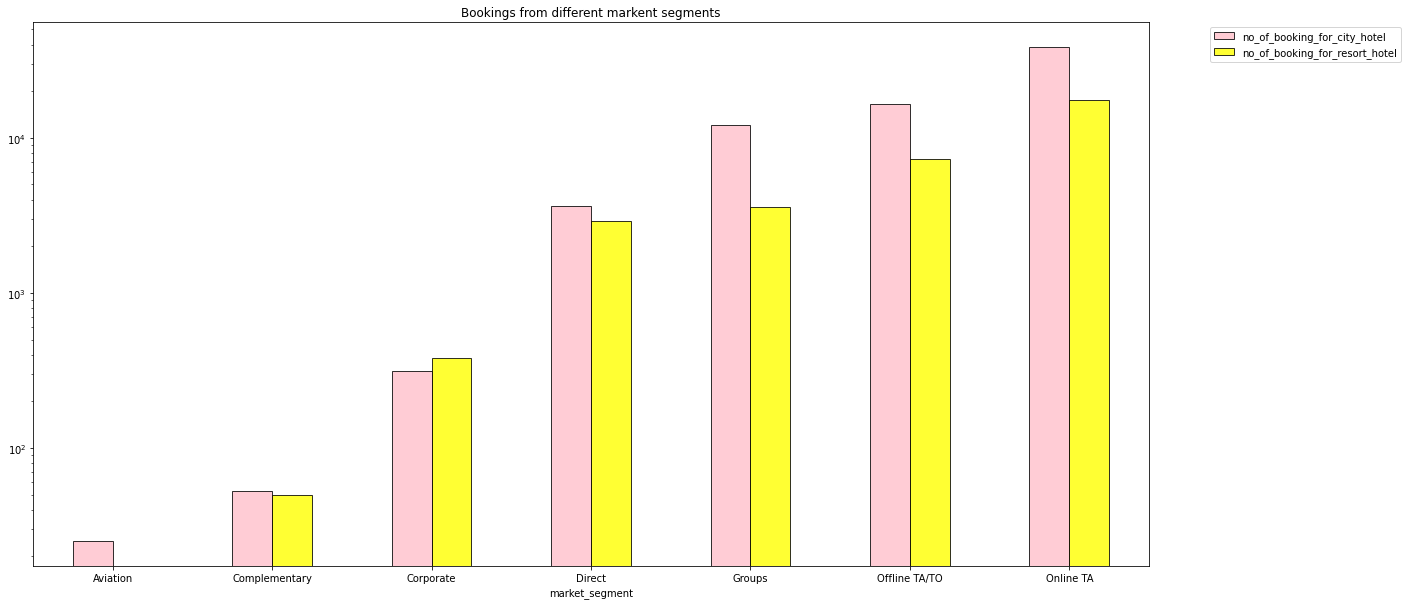

In [44]:
# Now it's time to plot and analyse the data:

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (20, 10)  

result_df.plot.bar(x='market_segment', logy=True, color=('pink','yellow'),alpha=0.8,edgecolor='black')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Bookings from different markent segments')
plt.show()

**CONCLUSION:**

 We found that TA(travel agents) are the major contributors of booking whether it is offline or online.However ,online TA bookings are more than offline .

 Aah...Internet is the lifesaver.

 In general,we saw that city hotels have more bookings than resort hotels,but that is not the case in Corporate market segment.

 From aviation segment,there is no booking for resort hotel which is obvious.

##   Average number of booking of couples, families and single person of couples hotel wise

 We have seen that customers can be broadly categorised as :-
*  single
*  couple
* family

so under this section, we will look into contribution of family/ccouple/single in bookings.

In [45]:
# creating three data frame according to no. of people stayed having columns  ["hotel" , "arrival_date_year" , "arrival_date_month" , "adults"]
couple_stay_df = hotel_df.loc[ (hotel_df["adults"] == 2) & (hotel_df["children"] == 0) &(hotel_df["babies"] == 0) , ["hotel" , "arrival_date_year" , "arrival_date_month" , "adults"] ]
single_stay_df = hotel_df.loc[ (hotel_df["adults"] == 1) & (hotel_df["children"] == 0) &(hotel_df["babies"] == 0), ["hotel" , "arrival_date_year" , "arrival_date_month" , "adults"]  ]
family_stay_df = hotel_df.loc[ (hotel_df["adults"] >2) , ["hotel" , "arrival_date_year" , "arrival_date_month" , "adults"] ]


In [46]:
couple_stay_df.head()

,hotel,arrival_date_year,arrival_date_month,adults
4,Resort Hotel,2015,July,2
5,Resort Hotel,2015,July,2
7,Resort Hotel,2015,July,2
8,Resort Hotel,2015,July,2
9,Resort Hotel,2015,July,2


In [47]:
# defining a function which will count the no. of bookings for a perticular month and append it to a list for each condition i.e. couple, single and family
def num_of_bookings_function (hotel_name, type_of_customer):
  num_of_bookings_list = []
  if type_of_customer == 'single':
    for month in ['July', 'August', 'September', 'October', 'November', 'December']:
        num_of_bookings = single_stay_df.loc[ (single_stay_df["arrival_date_year"] == 2015) & (single_stay_df["arrival_date_month"] == month )]['adults'].count()
        num_of_bookings_list.append(num_of_bookings)
  
    for month in ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']:
        num_of_bookings = single_stay_df.loc[ (single_stay_df["arrival_date_year"] == 2016) & (single_stay_df["arrival_date_month"] == month )]['adults'].count()
        num_of_bookings_list.append(num_of_bookings)


    for month in ['January', 'February', 'March', 'April', 'May', 'June','July', 'August']:
      num_of_bookings = single_stay_df.loc[ (single_stay_df["arrival_date_year"] == 2017) & (single_stay_df["arrival_date_month"] == month )]['adults'].count()
      num_of_bookings_list.append(num_of_bookings)
  
    return num_of_bookings_list

  elif type_of_customer == 'couple':
    for month in ['July', 'August', 'September', 'October', 'November', 'December']:
      num_of_bookings = couple_stay_df.loc[ (couple_stay_df["arrival_date_year"] == 2015) & (couple_stay_df["arrival_date_month"] == month )]['adults'].count()
      num_of_bookings_list.append(num_of_bookings)

    for month in ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']:
      num_of_bookings = couple_stay_df.loc[ (couple_stay_df["arrival_date_year"] == 2016) & (couple_stay_df["arrival_date_month"] == month )]['adults'].count()
      num_of_bookings_list.append(num_of_bookings)

    for month in ['January', 'February', 'March', 'April', 'May', 'June','July', 'August']:
      num_of_bookings = couple_stay_df.loc[ (couple_stay_df["arrival_date_year"] == 2017) & (couple_stay_df["arrival_date_month"] == month )]['adults'].count()
      num_of_bookings_list.append(num_of_bookings)
    return num_of_bookings_list

  else :
    for month in ['July', 'August', 'September', 'October', 'November', 'December']:
      num_of_bookings = family_stay_df.loc[ (family_stay_df["arrival_date_year"] == 2015) & (family_stay_df["arrival_date_month"] == month )]['adults'].count()
      num_of_bookings_list.append(num_of_bookings)

    for month in ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December']:
      num_of_bookings = family_stay_df.loc[ (family_stay_df["arrival_date_year"] == 2016) & (family_stay_df["arrival_date_month"] == month )]['adults'].count()
      num_of_bookings_list.append(num_of_bookings)

    for month in ['January', 'February', 'March', 'April', 'May', 'June','July', 'August']:
      num_of_bookings = family_stay_df.loc[ (family_stay_df["arrival_date_year"] == 2017) & (family_stay_df["arrival_date_month"] == month )]['adults'].count()
      num_of_bookings_list.append(num_of_bookings)
  
    return num_of_bookings_list



In [48]:
# calling the function and assigning list of counts in their respective variables
couple_booking_list_resort_holel = num_of_bookings_function ('Resort Hotel', 'couple')
single_booking_list_resort_holel = num_of_bookings_function ('Resort Hotel', 'single')
family_booking_list_resort_holel = num_of_bookings_function ('Resort Hotel', 'family')

couple_booking_list_city_holel = num_of_bookings_function ('City Hotel', 'couple')
single_booking_list_city_holel = num_of_bookings_function ('City Hotel', 'single')
family_booking_list_city_holel = num_of_bookings_function ('City Hotel', 'family')




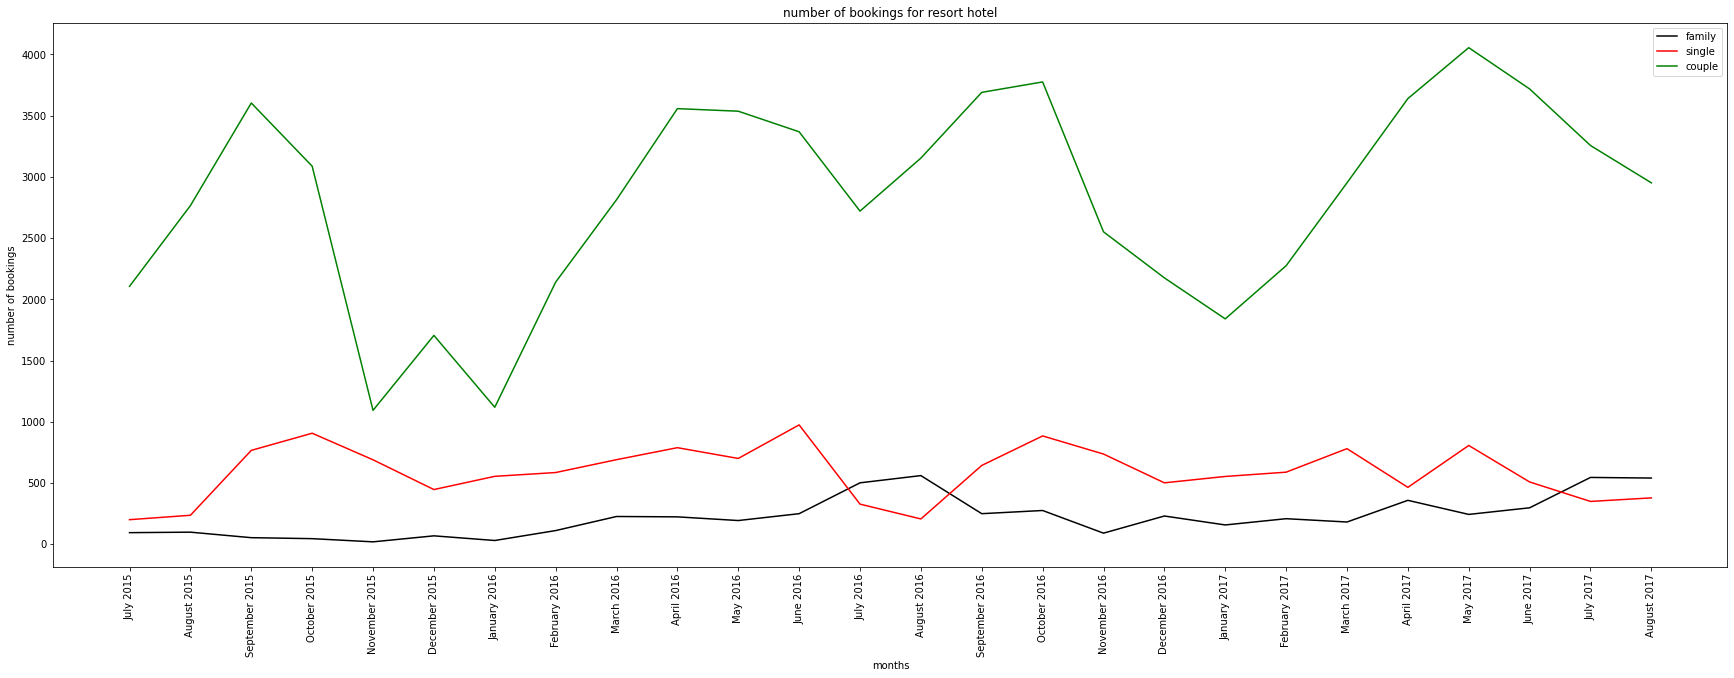

In [49]:
# plotting the graph for resort hotel
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (30, 10)
# plot lines
x_coordinates = list_of_months

y1_coordinates = family_booking_list_resort_holel
y2_coordinates = single_booking_list_resort_holel
y3_coordinates = couple_booking_list_resort_holel



fig, ax = plt.subplots()




ax.plot(x_coordinates,y1_coordinates,color='black')
ax.plot(x_coordinates,y2_coordinates,color='red')
ax.plot(x_coordinates,y3_coordinates,color='green')


ax.set_title('number of bookings for resort hotel')
ax.legend(['family' , 'single' , 'couple'])
ax.xaxis.set_label_text('months')
ax.yaxis.set_label_text('number of bookings')

plt.xticks(rotation=90)

plt.show()

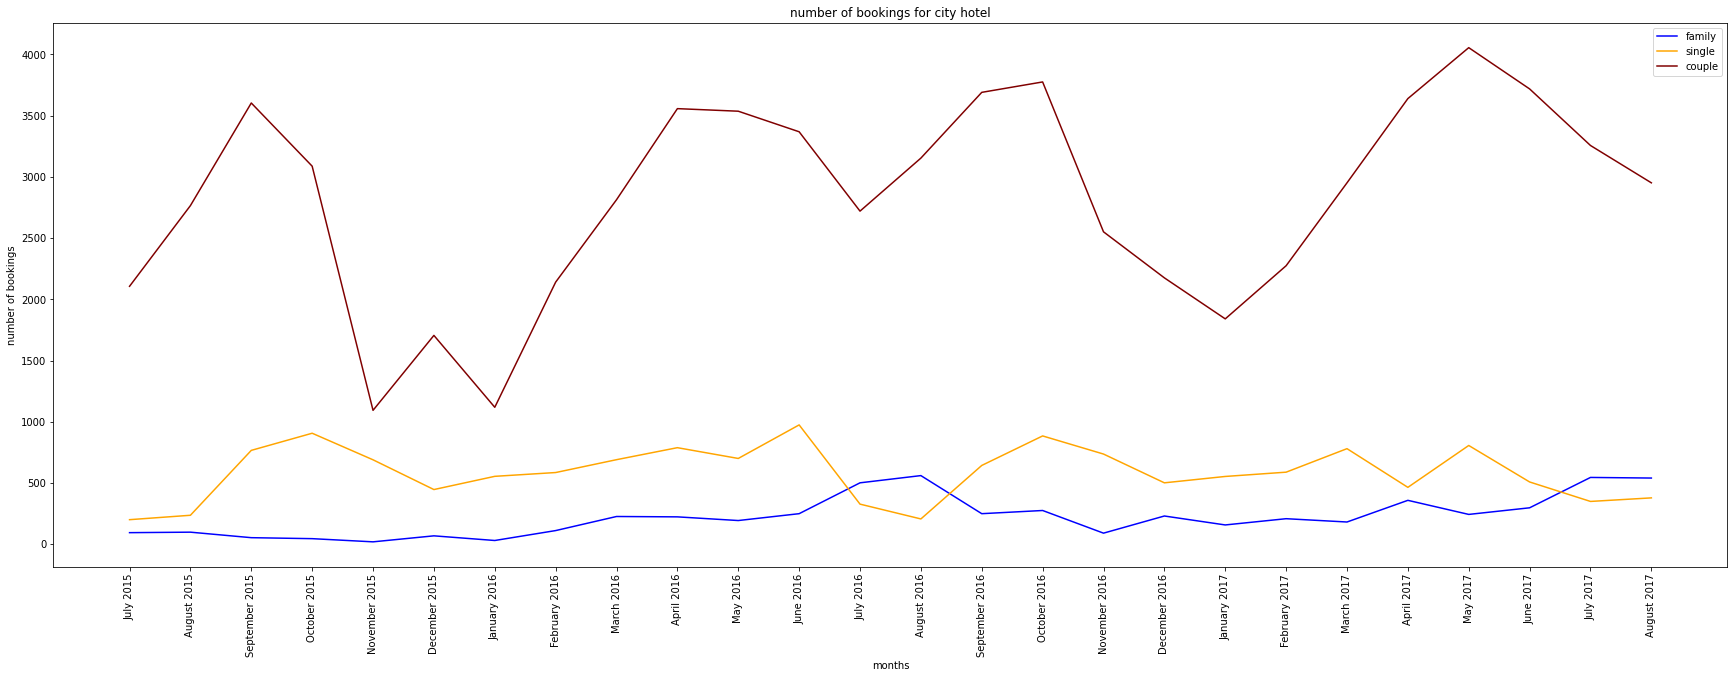

In [50]:
# again plotting the graph but this is for city hotel
x_coordinates = list_of_months

y1_coordinates = family_booking_list_city_holel
y2_coordinates = single_booking_list_city_holel
y3_coordinates = couple_booking_list_city_holel



fig, ax = plt.subplots()


ax.plot(x_coordinates,y1_coordinates,color='blue')
ax.plot(x_coordinates,y2_coordinates,color='orange')
ax.plot(x_coordinates,y3_coordinates,color='maroon')


ax.set_title('number of bookings for city hotel')
ax.legend(['family' , 'single' , 'couple'])
ax.xaxis.set_label_text('months')
ax.yaxis.set_label_text('number of bookings')

plt.xticks(rotation=90)

plt.show()

**Conclusion**

 It is clearly visible that trend of booking is same for both the hotel .

 It seems like "Couples" are running the hotel business.

 So,for any hotel, couples should be the prime target.

 Talking about singles and family,there is no clear trend of booking.Their booking level is more or less the same throughout the year.



# **LEAD TIME ANALYSIS**



At a hotel, the time taken between when a customer makes a reservation and their actual arrival is called the **Lead Time**. Sometimes this time period has to be restricted.

 Integrating a Lead Time Restriction into a hotel’s booking system is something all hotel Reservation Teams and/or Revenue Management departments should consider.

 **Why?**

Because it can help with the management of room availability overall, ensuring that profitability is always maximised. This usually applies to an offer, which is available up to a certain number of days prior to arrival. Can be combined with other restrictions. For example a 15% discount, which is non-refundable, up till 30 days prior to arrival. Such promotion are set-up not to coincide with the regular booking window, in order not to down trade ADR on your normal demand.

In [166]:
# extracting all values of lead time in new dataframe lead_time_df

lead_time_df = hotel_df['lead_time']


In [102]:
lead_time_df.head()


3    13
4    14
5    14
7     9
8    85
Name: lead_time, dtype: int64

 When we have a normally distributed sample ,we can legitimately use both the mean or the median as our measure of central tendency. In fact, in any symmetrical distribution the mean, median and mode are equal. 

 However, when our data is skewed, for example, as with the right-skewed data,
We find that the mean is being dragged in the direct of the skew. In these situations, the median is generally considered to be the best representative of the central location of the data. **The more skewed the distribution, the greater the difference between the median and mean, and the greater emphasis should be placed on using the median as opposed to the mean**.

In [103]:
#fetching values of overall mean and median 
mean_lead_time= lead_time_df.mean()

# The round() function returns a floating point number that is a rounded version of the specified number, with the specified number of decimals.

print(f'average lead time of overall bookings is {round(mean_lead_time,2)} hours.')
median_lead_time= lead_time_df.median()
print(f'median lead time of overall bookings is {round(median_lead_time,2)} hours.')



# analysing  hotels seperately


# segerating out resort hotel lead time
resort_hotel_lead_time_df=hotel_df.loc[ hotel_df['hotel']== 'Resort Hotel']['lead_time']

# calculating mean lead time for resort hotel
resort_hotel_mean_lead_time=resort_hotel_lead_time_df.mean()
print(f'mean lead time for resort hotel is {round(resort_hotel_mean_lead_time,2)} hours.')

# calculating median lead time for resort hotel
resort_hotel_median_lead_time=resort_hotel_lead_time_df.median()
print(f'median lead time for resort hotel is {round(resort_hotel_median_lead_time,2)} hours.')




# segerating out city hotel lead time
city_hotel_lead_time_df=hotel_df.loc[ hotel_df['hotel']== 'City Hotel']['lead_time']

# calculating mean lead time for city hotel
city_hotel_mean_lead_time=city_hotel_lead_time_df.mean()
print(f'mean lead time for city hotel is {round(city_hotel_mean_lead_time,2)}hours.')

# calculating median lead time for city hotel
city_hotel_median_lead_time=city_hotel_lead_time_df.median()
print(f'median lead time for city hotel is {round(city_hotel_median_lead_time,2)} hours.')






average lead time of overall bookings is 111.74 hours.
median lead time of overall bookings is 79.0 hours.
mean lead time for resort hotel is 100.31 hours.
median lead time for resort hotel is 72.0 hours.
mean lead time for city hotel is 116.83hours.
median lead time for city hotel is 82.0 hours.


In [104]:
# plotting the data obtained from above cell by firstly creating a dataframe using dictionary.

statistics_df=pd.DataFrame({'data':['overall lead time mean','overall lead time median','resort hotel mean lead time','resort hotel median lead time','city hotel mean lead time','city hotel median lead time'],'values':[mean_lead_time,median_lead_time,resort_hotel_mean_lead_time,resort_hotel_median_lead_time,city_hotel_mean_lead_time,city_hotel_median_lead_time]})

print(statistics_df)




                            data      values
0         overall lead time mean  111.740092
1       overall lead time median   79.000000
2    resort hotel mean lead time  100.308612
3  resort hotel median lead time   72.000000
4      city hotel mean lead time  116.833116
5    city hotel median lead time   82.000000


In [105]:
# Importing matplotlib.pyplot for plotting datas
import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%late

In [107]:
#setting the dimensions of our plot.
plt.rcParams['figure.figsize'] = (20,9)

Text(0, 0.5, 'Lead time in hours')

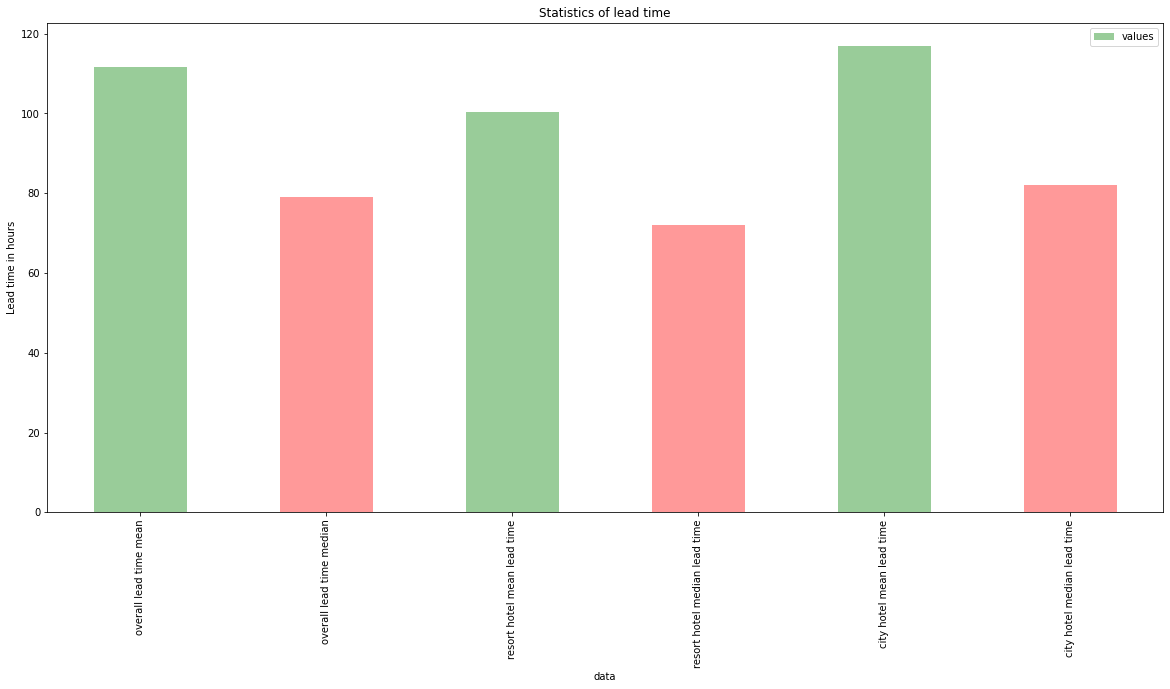

In [108]:
# plotting statistics_df dataframe
statistics_df.plot(x='data',y='values',kind='bar',color=('green','red'),alpha= 0.4)
plt.title('Statistics of lead time')
plt.ylabel('Lead time in hours')

 **Observations and Suggestions after analysis of lead time data**

After plotting the data we observe that ,there is a significant difference in mean and median which means distribution of lead time is skewed.Thus,giving more emphasis on median is relevant.

In [109]:
print(f'resort hotel management should expect bookings from customers with average lead time of {resort_hotel_mean_lead_time} hours with max bookings near {resort_hotel_median_lead_time} hours .')

print('\n')

print(f'city hotel management should expect bookings from customers with average lead time of {city_hotel_mean_lead_time} hours with max bookings near {city_hotel_median_lead_time} hours . ')

resort hotel management should expect bookings from customers with average lead time of 100.3086116103806 hours with max bookings near 72.0 hours .


city hotel management should expect bookings from customers with average lead time of 116.83311557859541 hours with max bookings near 82.0 hours . 


## **Cancelled booking analysis**

 Booking cancellations are undoubtly one of the biggest headache for hotel managers.
 
 This can arise many problems such as lowering the price of rooms so it can resell easily or loss of revenue when they cannot resell the room. 

In [110]:
# Here, We made a new dataframe as cancelled_df which contains the required columns to get know about cancelled bookings in the hotel.
cancelled_df= hotel_df.loc[hotel_df['is_canceled']==1]

In [111]:
cancelled_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,check_in_date
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,2015-05-06,2015-07-01
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,2015-04-22,2015-07-01
10,Resort Hotel,1,23,2015,July,27,1,0,4,2,...,No Deposit,240.0,0,Transient,123.0,0,0,Canceled,2015-06-23,2015-07-01
27,Resort Hotel,1,60,2015,July,27,1,2,5,2,...,No Deposit,240.0,0,Transient,107.0,0,2,Canceled,2015-05-11,2015-07-01
34,Resort Hotel,1,45,2015,July,27,2,1,3,3,...,No Deposit,241.0,0,Transient,108.8,0,1,Canceled,2015-05-19,2015-07-02


In [112]:

# Now, Let's try to find that how many times customers has cancelled the booking for Resort Hotel.

# extracting dataframe where hotel type  is resort hotel.
resort_cancelled_df= cancelled_df.loc[cancelled_df['hotel']== 'Resort Hotel']

#creating a dictionary with month as key and no of cancellation as its value.
resort_monthly_cancellation_dict = dict(resort_cancelled_df.arrival_date_month.value_counts())

#creating a dataframe from above dictionary
resort_monthly_cancellation_df= pd.DataFrame({'Month':resort_monthly_cancellation_dict.keys(),'no of cancellation':resort_monthly_cancellation_dict.values()})

print(resort_monthly_cancellation_df)

        Month  no of cancellation
0      August                1538
1        July                1323
2       April                 921
3        June                 905
4         May                 860
5   September                 819
6     October                 770
7       March                 665
8    February                 663
9    December                 531
10   November                 417
11    January                 272


In [113]:
# Let's call our friend for help
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'no of cancellations')

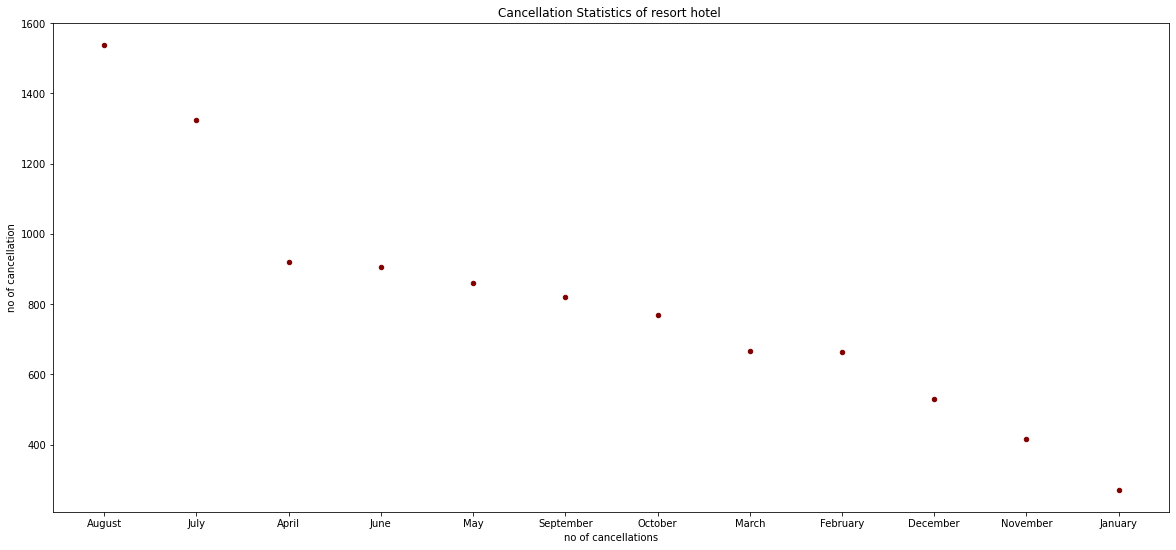

In [114]:
# Plot the graph of Cancelled bookings data of Resort Hotel. It is easier to understand by the graphs.
plt.rcParams['figure.figsize'] = (20,9)
resort_monthly_cancellation_df.plot(x='Month',y='no of cancellation',kind='scatter',color='maroon') 
plt.title('Cancellation Statistics of resort hotel ')
plt.xlabel('Months')
plt.xlabel('no of cancellations')


This figure is about cancellation of Resort hotel. We can observe from the graph that the most number of cancelled booking is in the month of August.


In [115]:
# Do the same thing with the City Hotel 

# extracting dataframe where hotel type  is city hotel.
city_cancelled_df= cancelled_df.loc[cancelled_df['hotel']== 'City Hotel']

#creating a dictionary with month as key and no of cancellation as its value.
city_monthly_cancellation_dict = dict(city_cancelled_df.arrival_date_month.value_counts())

#creating a dataframe from above dictionary
city_monthly_cancellation_df= pd.DataFrame({'Month':city_monthly_cancellation_dict.keys(),'no of cancellation':city_monthly_cancellation_dict.values()})

print(city_monthly_cancellation_df)

        Month  no of cancellation
0      August                3474
1       April                3217
2        June                3198
3         May                3191
4        July                3148
5     October                3117
6   September                3006
7       March                2173
8    February                1745
9    December                1646
10   November                1282
11    January                1280


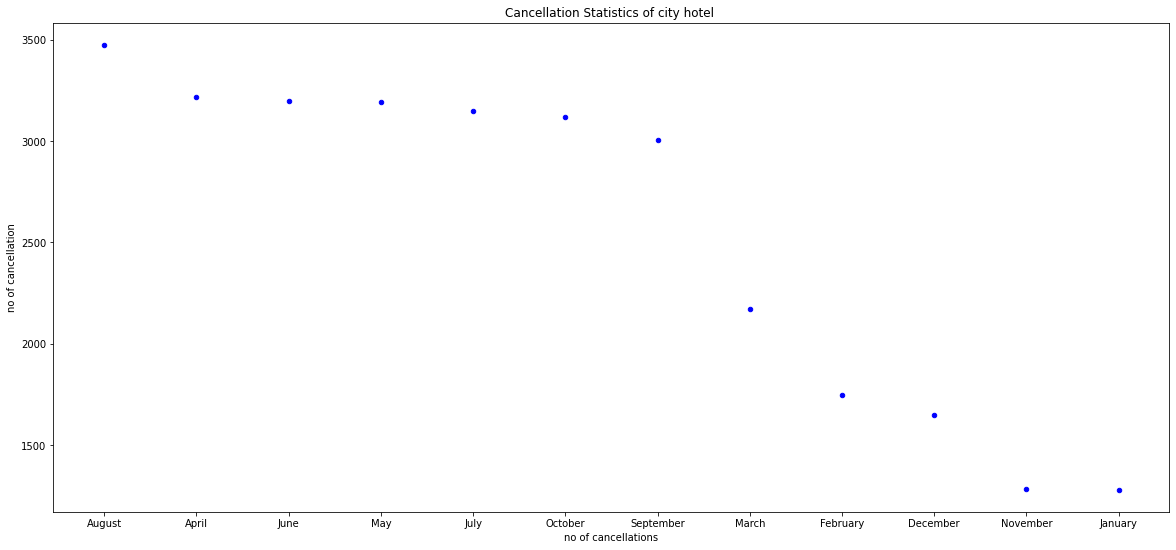

In [116]:


# Let's plot this too.. Don't work hard! Work smart and look at the graph!
city_monthly_cancellation_df.plot(x='Month',y='no of cancellation',kind='scatter',color='blue') 
plt.title('Cancellation Statistics of city hotel ')
plt.xlabel('Months')
plt.xlabel('no of cancellations')
plt.rcParams['figure.figsize'] = (20,9)

This figure is about cancellation of City hotel. We can observe from the graph that the most number of cancelled booking is in the month of August.


What we can do to reduce it let’s see Include a cancellation policy in your hotel reservation policy and make it visible to your guests. Make sure that your customers are held responsible in case of a no-show. This is another effective way to attract guests and reduce cancellations at your hotel. You can confirm the booking with your guest and then offer them a discount once done. You can throw in a clause here stating that if the guest pays upfront, they get a fatter discount.


#**Analysis of 'adr'(average daily rate) v/s weekend night stay, week night stay and composite night stay**

We know that in general hotel demands are higher in weekend than week days, hence this effects the booking price and also effects the revenue for hotels, So it is very necessary to analyse the same.

 In this part of the project we want to observe how 'adr'(average daily revenue) got effected by selecting weekend nights, week nights or both.

 I divided the this analysis in four parts :

1.   How 'adr' is changing with increase in number of weekend nights for those orders which has only bookings of weekend nights.
2.   How 'adr' is changing with increase in number of week nights for those orders which has only bookings of week nights.
3.   How 'adr' is changing with increase in length of stay.
4.   how adr is varying with time(month wise)

Let's see what we would get!



##  1. How 'adr' is changing with increase in number of weekend nights for those orders which has only bookings of weekend nights.

In [67]:
# Here I'm making the data frame named as 'weekend_nights_stay' which has only bookings of weekend nights, having three columns ["hotel", "stays_in_weekend_nights","adr"] in it:
weekend_nights_stay_df = hotel_df.loc[ (hotel_df["stays_in_weekend_nights"] != 0) & (hotel_df["stays_in_week_nights"] == 0) , ["hotel", "stays_in_weekend_nights","adr"]]

In [68]:
# Let's check the datas
weekend_nights_stay_df.head()

,hotel,stays_in_weekend_nights,adr
131,Resort Hotel,1,88.2
132,Resort Hotel,1,97.0
133,Resort Hotel,1,85.1
134,Resort Hotel,1,89.0
135,Resort Hotel,1,80.1


In [69]:
# Let's see how many orders are there:

weekend_nights_stay_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5235 entries, 131 to 119106
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hotel                    5235 non-null   object 
 1   stays_in_weekend_nights  5235 non-null   int64  
 2   adr                      5235 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 163.6+ KB


So, we have 5235 such orders.

In [70]:
# Let's see what are the unique values in 'stays_in_weekend_nights' column
weekend_nights_stay_df.stays_in_weekend_nights.unique()

array([1, 2])

In [72]:
# Let's see what are the unique values in 'hotel' column

weekend_nights_stay_df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

Here we are getting two unique values for column 'stays_in_weekend_nights' i.e. 1 and 2 , that means someone booked for one weekend night(saturday or sunday) and some booked for two weekend nights(saturday and sunday) .

Also we got two unique values in column 'hotel'. That means we have two hotel type i.e. city hotel and resort hotel.

In [73]:
# calculating mean value of adr for single weekend night stay in resort hotel

one_weekend_night_stay_resort_hotel_avg_adr = weekend_nights_stay_df.loc[ (weekend_nights_stay_df["hotel"] == 'Resort Hotel') & (weekend_nights_stay_df["stays_in_weekend_nights"] == 1)]['adr'].mean()

In [74]:
# calculating mean value of adr for two weekend nights and resort hotel

two_weekend_night_stay_resort_hotel_avg_adr = weekend_nights_stay_df.loc[ (weekend_nights_stay_df["hotel"] == 'Resort Hotel') & (weekend_nights_stay_df["stays_in_weekend_nights"] == 2)]['adr'].mean()

In [75]:
# calculating mean value of adr for one weekend night and city hotel

one_weekend_night_stay_city_hotel_avg_adr = weekend_nights_stay_df.loc[ (weekend_nights_stay_df["hotel"] == 'City Hotel') & (weekend_nights_stay_df["stays_in_weekend_nights"] == 1)]['adr'].mean()

In [77]:
# calculating mean value of adr for two weekend nights and city hotel

two_weekend_night_stay_city_hotel_avg_adr = weekend_nights_stay_df.loc[ (weekend_nights_stay_df["hotel"] == 'City Hotel') & (weekend_nights_stay_df["stays_in_weekend_nights"] == 2)]['adr'].mean()

In [78]:
# Let's see what we got:

print(f'average adr for single weekend night stay in resort hotel is {one_weekend_night_stay_resort_hotel_avg_adr} ')
print(f'average adr for two weekend night stay in resort hotel is {two_weekend_night_stay_resort_hotel_avg_adr} ')
print(f'average adr for single weekend night stay in city hotel is {one_weekend_night_stay_city_hotel_avg_adr} ')
print(f'average adr for two weekend night stay in city hotel is {two_weekend_night_stay_city_hotel_avg_adr} ')

average adr for single weekend night stay in resort hotel is 80.46863858961804 
average adr for two weekend night stay in resort hotel is 101.14748868778281 
average adr for single weekend night stay in city hotel is 110.91058768218147 
average adr for two weekend night stay in city hotel is 105.58635258358662 


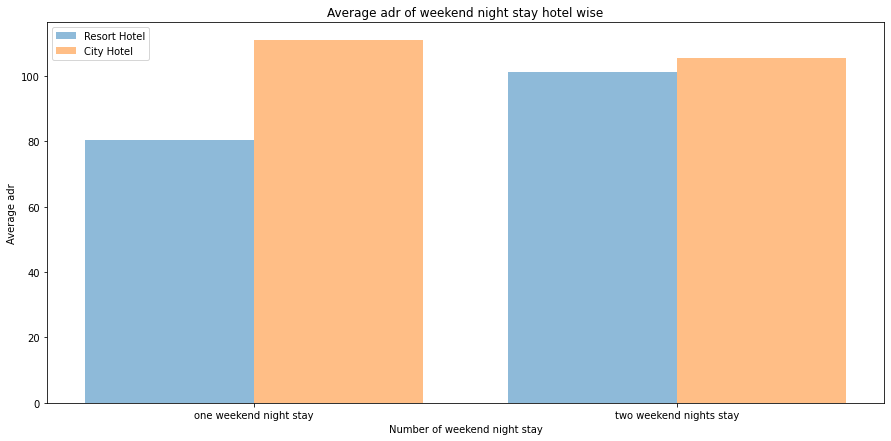

In [79]:
# plotting the values by storing them in lists

import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (15, 7)  
X = ['one weekend night stay' , 'two weekend nights stay']
avg_adr_list_resort_hotel = [one_weekend_night_stay_resort_hotel_avg_adr , two_weekend_night_stay_resort_hotel_avg_adr]
avg_adr_list_city_hotel = [one_weekend_night_stay_city_hotel_avg_adr , two_weekend_night_stay_city_hotel_avg_adr]
  
X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, avg_adr_list_resort_hotel, 0.4, label = 'Resort Hotel', alpha = 0.5)
plt.bar(X_axis + 0.2, avg_adr_list_city_hotel, 0.4, label = 'City Hotel', alpha = 0.5)
  
plt.xticks(X_axis, X)
plt.xlabel("Number of weekend night stay")
plt.ylabel("Average adr")
plt.title("Average adr of weekend night stay hotel wise")
plt.legend()
plt.show()

**CONCLUSION:**

In the above plot we can observe that as we move from one weekend night stay to two weekend night stay in resort hotel, average daily revenue is increasing but it is slightly decreasing in case of city hotel.

##2. How 'adr' is changing with increase in number of week nights for those orders which has only bookings of week nights.

In [80]:
# making the data frame which orders has only bookings of week nights having three columns ["hotel", "stays_in_week_nights","adr"] in it.

week_nights_stay_df = hotel_df.loc[ (hotel_df["stays_in_weekend_nights"] == 0) & (hotel_df["stays_in_week_nights"] != 0) , ["hotel" , "stays_in_week_nights","adr"]]


In [81]:
#Let's see how many orders are there:

week_nights_stay_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41931 entries, 3 to 119354
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hotel                 41931 non-null  object 
 1   stays_in_week_nights  41931 non-null  int64  
 2   adr                   41931 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


Ok, we have 41931 such orders.

In [82]:
# Let's see what are the unique values in 'stays_in_weekend_nights' column
week_nights_stay_df.stays_in_week_nights.unique()

array([1, 2, 3, 4, 5])

In [83]:
# Let's see what are the unique values in 'hotel' column

week_nights_stay_df.hotel.unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [84]:
# defining a function to calculate average adr according to the no. of week nights stay i.e. [1,2,3,4,5] and storing it in a list
def average_adr (hotel_name):
  avg_adr_list = []
  for day_num in range(1 , 6):
    avg_adr = week_nights_stay_df.loc[ (week_nights_stay_df["hotel"] == hotel_name) & (week_nights_stay_df["stays_in_week_nights"] == day_num )]['adr'].mean()
    avg_adr_list.append(avg_adr)
  return avg_adr_list


In [85]:
# calling the function
avg_adr_list_city_hotel = average_adr('City Hotel')
print(avg_adr_list_city_hotel)
avg_adr_list_resort_hotel = average_adr('Resort Hotel')
print(avg_adr_list_resort_hotel)

[112.36128669900435, 99.87044142484262, 110.59233493397358, 107.86860713095635, 108.0877024070022]
[80.96199764982374, 97.60156238827315, 101.28371918542335, 113.87532467532468, 124.61732876712327]


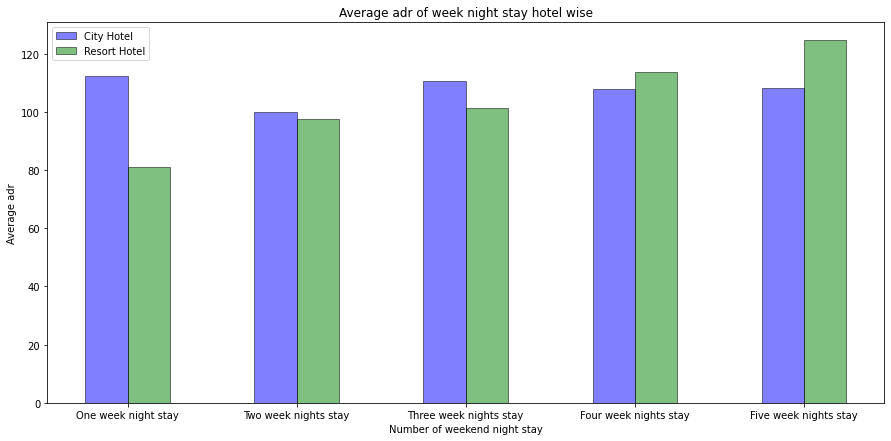

In [86]:
# plotting the graph using those list data
plt.rcParams['figure.figsize'] = (15, 7)
n=5
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, avg_adr_list_city_hotel, color = 'b',
        width = width, edgecolor = 'black',
        label='City Hotel',alpha = 0.5)
plt.bar(r + width, avg_adr_list_resort_hotel, color = 'g',
        width = width, edgecolor = 'black',
        label='Resort Hotel',alpha = 0.5)
  
plt.xlabel("Number of weekend night stay")
plt.ylabel("Average adr")
plt.title("Average adr of week night stay hotel wise")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,['One week night stay' , 'Two week nights stay','Three week nights stay' , 'Four week nights stay', 'Five week nights stay'])
plt.legend()
  
plt.show()

**CONCLUSION:**  

In the above plot, we can observe that as we are increasing number of week night stay in resort hotel, average daily revenue is increasing,

 but in case of city hotel it isn't following any particular pattern, adr is maximun for single week night stay and minimum for two week nights stay.

## 3. How 'adr' is changing with increase in length of stay.

In [87]:
# making the data frame which holds all orders which has bookings of both weekend and week nights having four columns ["hotel","stays_in_weekend_nights", "stays_in_week_nights","adr"] in it.

composite_nights_stay_df = hotel_df.loc[ (hotel_df["stays_in_weekend_nights"] != 0) & (hotel_df["stays_in_week_nights"] != 0) , ["hotel" ,"stays_in_weekend_nights", "stays_in_week_nights","adr"]]

In [88]:
#Let's see how many orders are there:

composite_nights_stay_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55238 entries, 20 to 119389
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hotel                    55238 non-null  object 
 1   stays_in_weekend_nights  55238 non-null  int64  
 2   stays_in_week_nights     55238 non-null  int64  
 3   adr                      55238 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.1+ MB


So, it has 55238 such orders.

In [89]:
#Let's see some order data:

composite_nights_stay_df.head()

,hotel,stays_in_weekend_nights,stays_in_week_nights,adr
20,Resort Hotel,1,4,97.29
21,Resort Hotel,2,4,84.67
22,Resort Hotel,2,4,84.67
23,Resort Hotel,2,4,99.67
24,Resort Hotel,2,5,94.95


Here we need one new column which will hold the length of stay, for this we need to add 'stays_in_weekend_nights' and 'stays_in_week_nights' column values and push it into 'length_of_stay' column.

In [90]:
# lets create the new column 'length_of_stay'

composite_nights_stay_df["length_of_stay"] = composite_nights_stay_df["stays_in_weekend_nights"] + composite_nights_stay_df["stays_in_week_nights"]

In [91]:
#Let's see what happened:

composite_nights_stay_df.head()

,hotel,stays_in_weekend_nights,stays_in_week_nights,adr,length_of_stay
20,Resort Hotel,1,4,97.29,5
21,Resort Hotel,2,4,84.67,6
22,Resort Hotel,2,4,84.67,6
23,Resort Hotel,2,4,99.67,6
24,Resort Hotel,2,5,94.95,7


In [92]:
# Let's see what are the unique values in 'length_of_stay' column
composite_nights_stay_df.length_of_stay.unique()

array([ 5,  6,  7, 15,  4, 11, 14,  3,  8,  9, 10, 21,  2, 13, 12, 18, 46,
       28, 17, 22, 23, 16, 29, 19, 42, 20, 30, 56, 26, 25, 27, 35, 38, 24,
       48, 57, 43])

Ok! here we have more than one data for the single length of stay, hence we have to take average adr of them.

Let's do it!

In [93]:
list_of_lengths = list(composite_nights_stay_df.length_of_stay.unique())
list_of_lengths.sort()
print(list_of_lengths)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 35, 38, 42, 43, 46, 48, 56, 57]


In [94]:

avg_adr_list_for_city_hotel = []
avg_adr_list_for_resort_hotel = []
for length in list_of_lengths:
  avg_adr_city_hotel = composite_nights_stay_df.loc[ (composite_nights_stay_df["hotel"] == 'City Hotel') & (composite_nights_stay_df["length_of_stay"] == length )]['adr'].mean()
  avg_adr_resort_hotel = composite_nights_stay_df.loc[ (composite_nights_stay_df["hotel"] == 'Resort Hotel') & (composite_nights_stay_df["length_of_stay"] == length )]['adr'].mean()
  avg_adr_list_for_city_hotel.append(avg_adr_city_hotel)
  avg_adr_list_for_resort_hotel.append(avg_adr_resort_hotel)


In [95]:
print(avg_adr_list_for_city_hotel)
print(avg_adr_list_for_resort_hotel)

[101.94166701223304, 106.63148536478812, 106.79394698579577, 111.17055167597763, 113.94774847870184, 112.40833074131673, 112.88561797752811, 117.69596938775511, 108.97807486631017, 116.22291666666666, 103.68763636363637, 124.30628571428569, 123.4, 95.8, 102.65538461538459, 115.98857142857142, 103.01285714285714, 107.89818181818183, 80.60083333333334, 124.55888888888889, 77.58142857142857, 68.23, 79.108, 85.695, 106.31333333333333, 89.61666666666667, 74.27250000000001, 113.577, 94.44, nan, nan, nan, 0.0, nan, 0.0, nan, 8.34]
[89.56336639801611, 99.4972436391673, 103.92667915531335, 121.38646064703043, 128.59901863354037, 100.11659437751005, 115.89182344428365, 113.79447183098591, 106.06565610859728, 110.19815094339623, 106.69762589928058, 100.3119540229885, 90.3674678663239, 87.40423076923078, 89.51173913043478, 89.825, 72.90857142857143, 96.78, 24.94, 70.10052631578948, 71.92833333333334, 41.31166666666667, nan, 57.06057142857143, 55.8, 49.95, 56.423333333333325, 35.343333333333334, 51

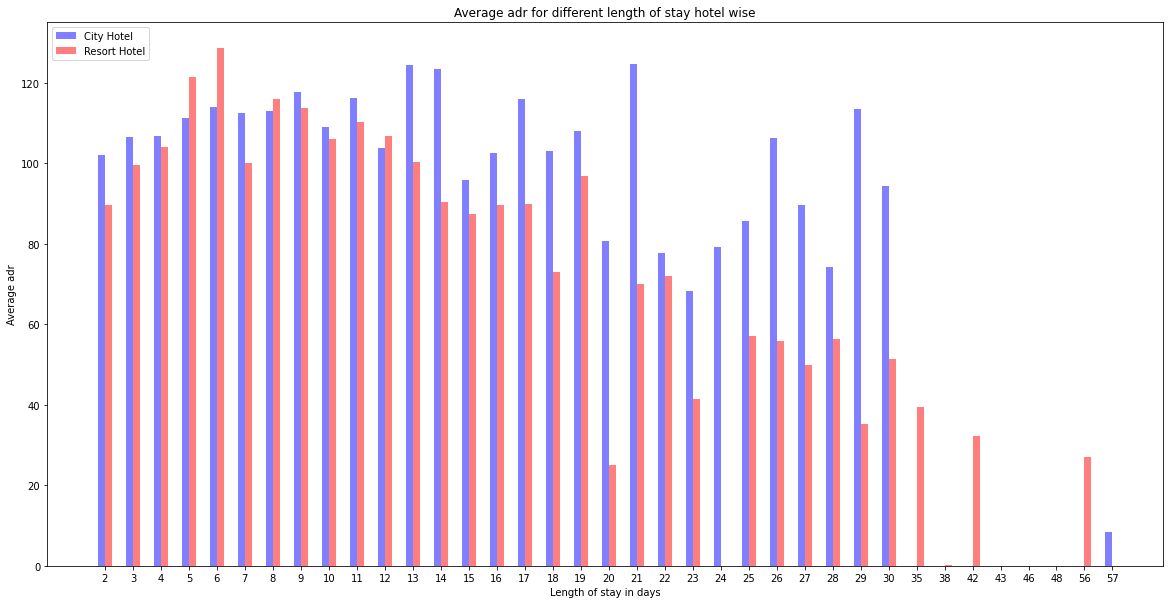

In [96]:
# Now its time to plot all those data

plt.rcParams['figure.figsize'] = (20, 10)
n=len(list_of_lengths)
r = np.arange(n)
width = 0.25
  
  
plt.bar(r, avg_adr_list_for_city_hotel, color = 'b',
        width = width, 
        label='City Hotel', alpha = 0.5)
plt.bar(r + width, avg_adr_list_for_resort_hotel, color = 'r',
        width = width, 
        label='Resort Hotel',alpha = 0.5)
  
plt.xlabel("Length of stay in days")
plt.ylabel("Average adr")
plt.title("Average adr for different length of stay hotel wise")
  
# plt.grid(linestyle='--')
plt.xticks(r + width/2,list_of_lengths)
plt.legend()

plt.show()

**CONCLUSION:**

 Here we can observe for composite night stay we are getting maximum adr for 21 days stay in city hotels, but as we are moving to much longer stays more than 30 days, adr is drastically decreasing.

For resort hotel we are getting maximum adr for 6 days stay and as we are moving towards longer stays we can see the same as of city hotel.


##4. how adr is varying with time(month wise)

In [97]:
#Find mean value of adr Montheise
avg_adr_list_month_wise = []
list_of_months = []

for month in ['July', 'August', 'September', 'October', 'November', 'December']:
  avg_adr = hotel_df.loc[ (hotel_df["arrival_date_year"] == 2015) & (hotel_df["arrival_date_month"] == month )]['adr'].mean()
  avg_adr_list_month_wise.append(avg_adr)
  list_of_months.append(month + ' 2015')
    

for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']:
  avg_adr = hotel_df.loc[ (hotel_df["arrival_date_year"] == 2016) & (hotel_df["arrival_date_month"] == month )]['adr'].mean()
  avg_adr_list_month_wise.append(avg_adr)
  list_of_months.append(month + ' 2016')


for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August']:
  avg_adr = hotel_df.loc[ (hotel_df["arrival_date_year"] == 2017) & (hotel_df["arrival_date_month"] == month )]['adr'].mean()
  avg_adr_list_month_wise.append(avg_adr)
  list_of_months.append(month + ' 2017')


In [98]:
print(avg_adr_list_month_wise)
print(list_of_months)

[96.07877630553389, 104.14950760966876, 95.80429388473384, 81.43872238232468, 62.84210043196545, 73.53868443316414, 68.04796056338027, 72.2652248112898, 82.10475458601883, 90.8151587628866, 98.11476677316294, 108.14135390946501, 125.81788918205805, 142.53722909556313, 115.84587872559095, 99.44176939123838, 82.35790067720092, 86.26185196560195, 78.40090941898231, 80.38293702177751, 85.36464128843338, 115.0661948529412, 120.84640578635016, 128.04972284038035, 145.08156044407895, 164.9942672134686]
['July 2015', 'August 2015', 'September 2015', 'October 2015', 'November 2015', 'December 2015', 'January 2016', 'February 2016', 'March 2016', 'April 2016', 'May 2016', 'June 2016', 'July 2016', 'August 2016', 'September 2016', 'October 2016', 'November 2016', 'December 2016', 'January 2017', 'February 2017', 'March 2017', 'April 2017', 'May 2017', 'June 2017', 'July 2017', 'August 2017']


In [99]:
d = {'months_of_year': list_of_months,'average_adr': avg_adr_list_month_wise}
new_df = pd.DataFrame(d)
new_df.head(30)

,months_of_year,average_adr
0,July 2015,96.078776
1,August 2015,104.149508
2,September 2015,95.804294
3,October 2015,81.438722
4,November 2015,62.842100
5,December 2015,73.538684
6,January 2016,68.047961
7,February 2016,72.265225
8,March 2016,82.104755
9,April 2016,90.815159


Text(0, 0.5, 'average adr')

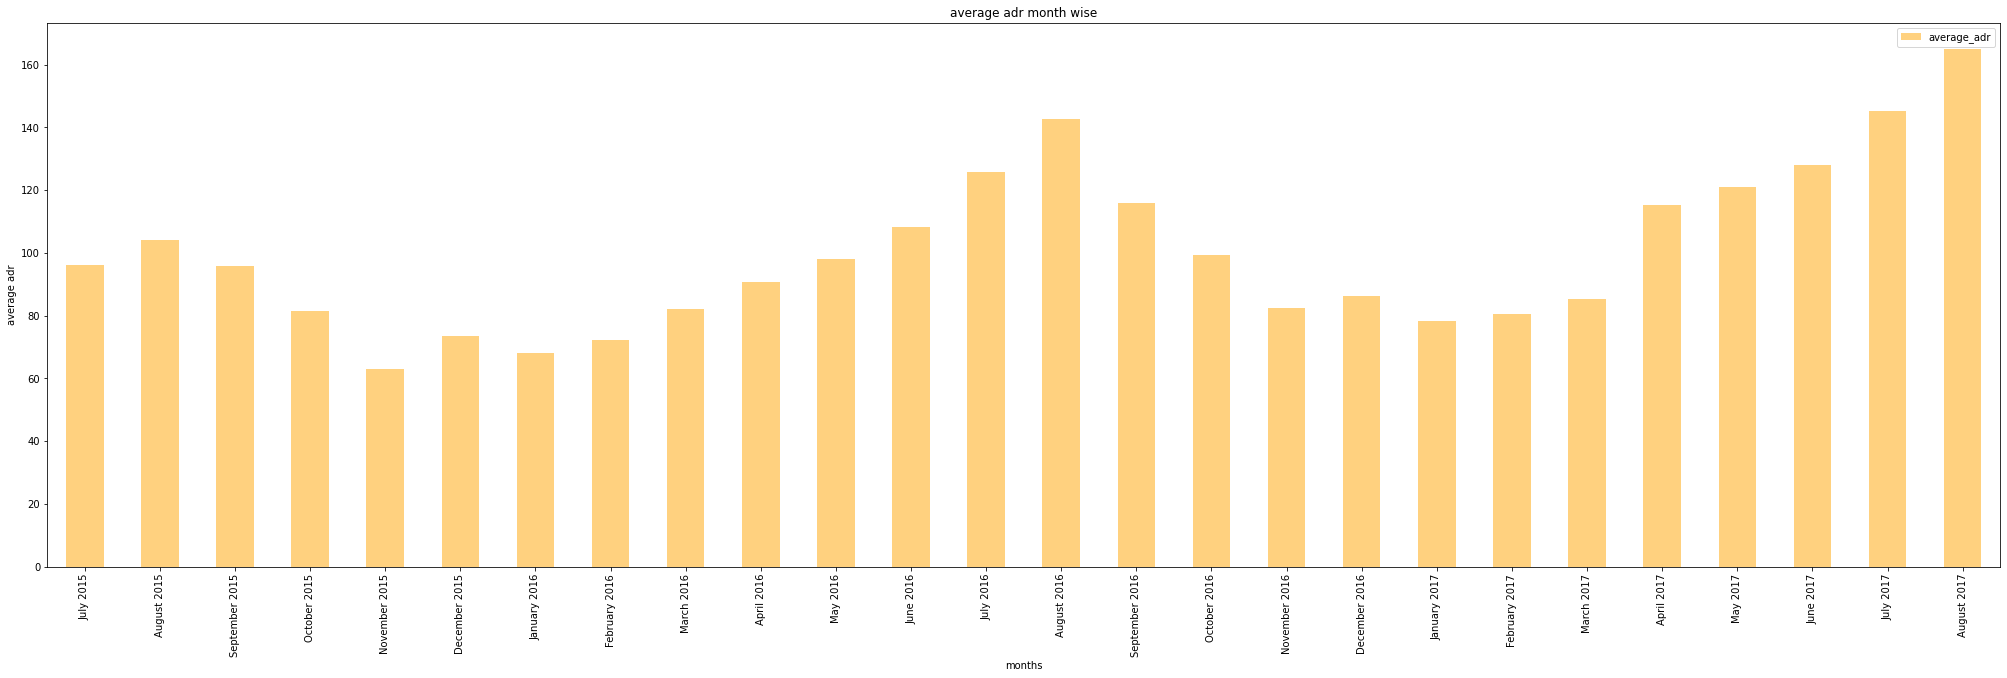

In [100]:
# plotting the graph for resort hotel
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (35, 10)
# plot lines

new_df.plot(x = 'months_of_year',y = 'average_adr',kind='bar',color='orange',alpha=0.5)
plt.title('average adr month wise')
plt.xlabel("months")
plt.ylabel("average adr")

**CONCLUSION:**

Through the above plot we can observe that in every year adr starts decreasing from month september and it gets its minimum value in between novenmber and january, after that adr starts increasing and it gets its peak in august.

 Secondly, if we observe year wise we will get adr value slightly increased in comparison to previous year.

# **Meal preference analysis**

Analyzing customer meal preference data allows us to understand the customer preferences and purposes. Moreover,analysing the customer data can help us to forecast the demand and pattern of customer behaviour with higher accuracy.

In [117]:
# Select only the record of meal preferences
meal_prefer_df = hotel_df[['meal']]

In [118]:
meal_prefer_df.head()

,meal
3,BB
4,BB
5,BB
7,FB
8,BB


As we already know that :-

SC means self-catering (no meals are included).

BB means bed and breakfast,in which breakfast is served in room itself.

HB means half board, in which breakfast and dinner are included.

FB means full board, in which breakfast, lunch and dinner are included.

In [119]:
#Let's create a dictionary where 'type of meal' is its key and 'no of counts of that meal' is its value.

meal_dict=dict(meal_prefer_df.value_counts())
print(meal_dict)

{('BB',): 77638, ('HB',): 13421, ('SC',): 10334, ('Undefined',): 830, ('FB',): 671}


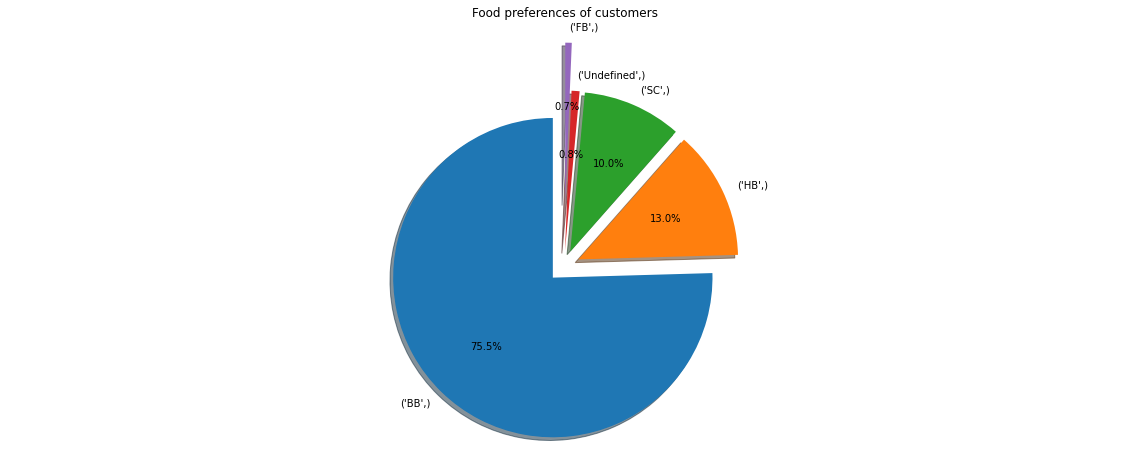

In [120]:
# Now we have to plot the data to meal v/s its count in a pie chart

meal_count=list(meal_dict.values())

meal=list(meal_dict.keys())

plt.rcParams['figure.figsize'] = (20,8)
explode = (0.1, 0.1, 0.1, 0.1,0.4)

fig1, ax1 = plt.subplots()
ax1.pie(meal_count, explode=explode, labels=meal, autopct='%1.1f%%',shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Food preferences of customers')
plt.show()

**Observation and Suggestions**

It is observed that most guests preferred BB (bed & breakfast).

 BB is best for those who aren’t morning people and don’t want to worry about preparing breakfast for themselves or having to choose somewhere to have breakfast served. That's why customers prefer BB . In some hotels BB is included in room rate.




 FB is the least preferred meal type. This meal type suits to those people who don't want to move much and stay at the hotel during the whole day.In addition to this high price rate for FB meal may be the reason for its least preference.



**Hotel management can work upon "rate of the meal" to lure customers towards FB and HB meal.**

# **Analysis of country data**

For any hotel,it is very important to know about their customer background,so that they could do modificatons and able to give customers best experience.

In [122]:
# let's find out ,how many countries data we have?

no_of_country=hotel_df['country'].nunique() 
print(f'We have data of {no_of_country} countries . ')

print('\n')

# segerating out list of countries associated with resort hotel
# converting dataframe to list to set so that we get name of unique counties
resort_hotel_country_set = set(hotel_df.loc[hotel_df['hotel']=='Resort Hotel']['country'].tolist())
print(f'People from {len(resort_hotel_country_set)} countries come to resort hotel.')

print('\n')

# segerating out list of countries associated with city hotel
# converting dataframe to list to set so that we get name of unique counties
city_hotel_country_set = set(hotel_df.loc[hotel_df['hotel']=='City Hotel']['country'].tolist())
print(f'People from {len(city_hotel_country_set)} countries come to city hotel.')

print('\n')

# let's find out how many countries are  associated only with resort hotel.
only_resort_country = resort_hotel_country_set - city_hotel_country_set
print(f'People from {len(only_resort_country)} prefer only resort hotel not city hotel.')

print('\n')

# let's find out how many countries are  associated only with city hotel.
only_city_country = city_hotel_country_set - resort_hotel_country_set
print(f'People from {len(only_city_country)} prefer only city hotel not resort hotel.')

print('\n')

# let's find out how many countries are associated with both the hotels.
prefer_both_hotels= len(resort_hotel_country_set.intersection(city_hotel_country_set))
print(f'People from {prefer_both_hotels} prefer both hotels .')



We have data of 174 countries . 


People from 121 countries come to resort hotel.


People from 165 countries come to city hotel.


People from 9 prefer only resort hotel not city hotel.


People from 53 prefer only city hotel not resort hotel.


People from 112 prefer both hotels .


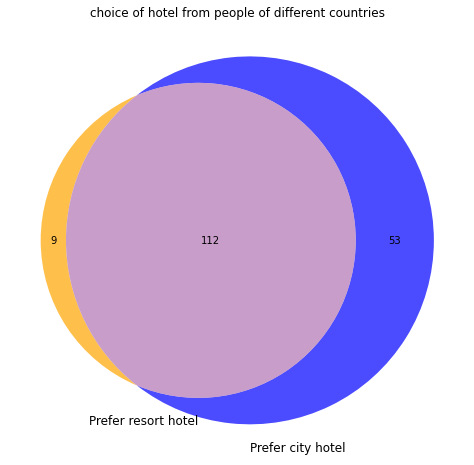

In [123]:
from matplotlib_venn import venn2

# plotting venn diagram of choice of hotel from people of different countries
venn2([resort_hotel_country_set,city_hotel_country_set], ('Prefer resort hotel', 'Prefer city hotel'),set_colors=("orange","blue"),alpha=0.7)

plt.title('choice of hotel from people of different countries')
plt.show()

**Conclusion**

From the venn diagram,

we can see that people from 112 countries visit both hotels,

whereas people from 53 countries visit only city hotel and people from 9 countries visit only 9 countries.

## **Analysing  hotels**

**Analysing resort hotel**

In [124]:
# creating a dictionary for resort hotel in which country name is key and no of bookings is its value.
resort_hotel_country_dict=dict(hotel_df.loc[hotel_df['hotel']=='Resort Hotel']['country'].value_counts())

# creating a dataframe from the above dictionary
resort_hotel_country_df=pd.DataFrame({'country':resort_hotel_country_dict.keys(),'No of bookings':resort_hotel_country_dict.values()})

In [125]:
resort_hotel_country_df.head()

,country,No of bookings
0,PRT,12285
1,GBR,5699
2,ESP,3664
3,IRL,2035
4,FRA,1446


Text(0.5, 1.0, 'Bookings from different countries for Resort hotel')

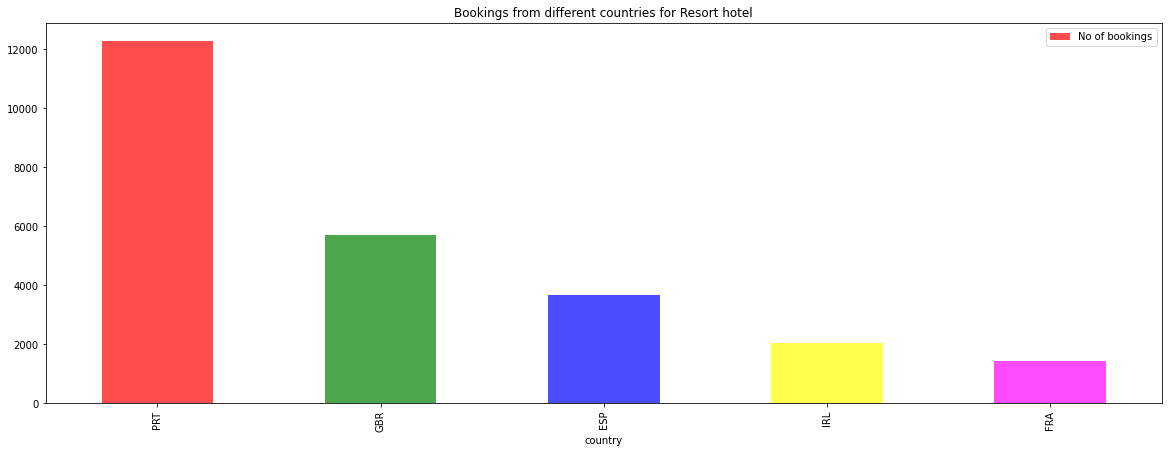

In [126]:
# Now we plot top 5 ountries from where  maximum people visit to a resort hotel
plt.rcParams['figure.figsize'] = (20,7)
resort_hotel_country_df[:5].plot(x='country',y='No of bookings',kind='bar',color=('red','green','blue','yellow','magenta'),alpha=0.7)
plt.title('Bookings from different countries for Resort hotel')


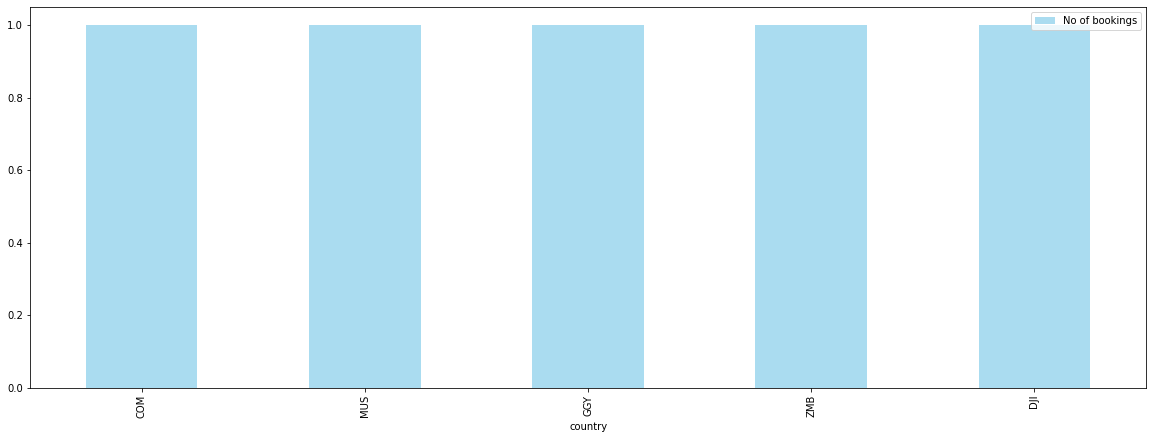

In [127]:
# Now we plot bottom  5 ountries from where  minimum people visit to a resort hotel
resort_hotel_country_df[-5:].plot(x='country',y='No of bookings',kind='bar',color=('skyblue'),alpha=0.7)

**Analysing city hotel** 

In [128]:
# creating a dictionary for city hotel in which country name is key and no of bookings is its value
city_hotel_country_dict=dict(hotel_df.loc[hotel_df['hotel']=='City Hotel']['country'].value_counts())

# creating a dataframe from the above dictionary
city_hotel_country_df=pd.DataFrame({'country':city_hotel_country_dict.keys(),'No of bookings':city_hotel_country_dict.values()})

In [129]:
city_hotel_country_df.head()

,country,No of bookings
0,PRT,25306
1,FRA,8364
2,DEU,5898
3,GBR,5190
4,ESP,4184


Text(0.5, 1.0, 'Bookings from different countries for City hotel')

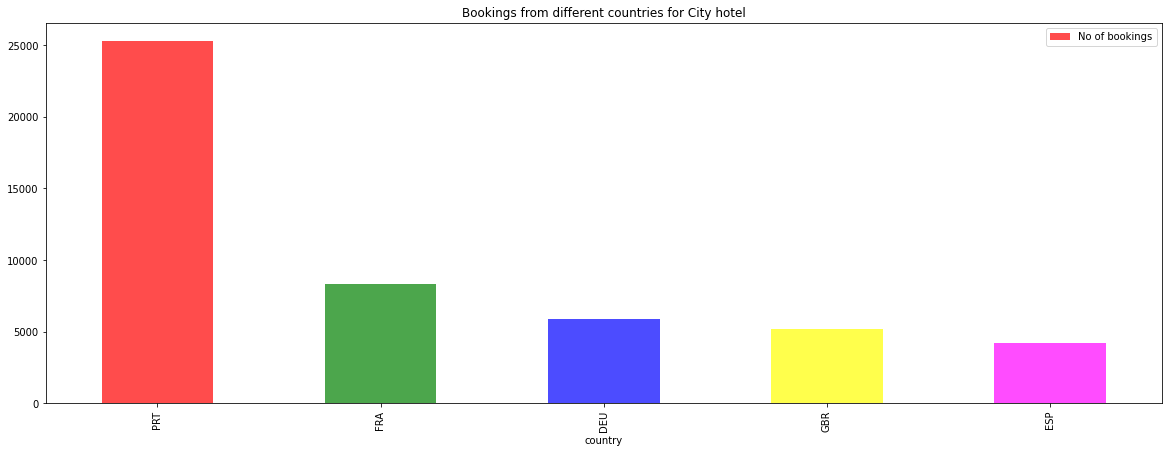

In [130]:
# Now we plot top 5 ountries from where  maximum people visit to a city hotel
plt.rcParams['figure.figsize'] = (20,7)
city_hotel_country_df[:5].plot(x='country',y='No of bookings',kind='bar',color=('red','green','blue','yellow','magenta'),alpha=0.7)
plt.title('Bookings from different countries for City hotel')

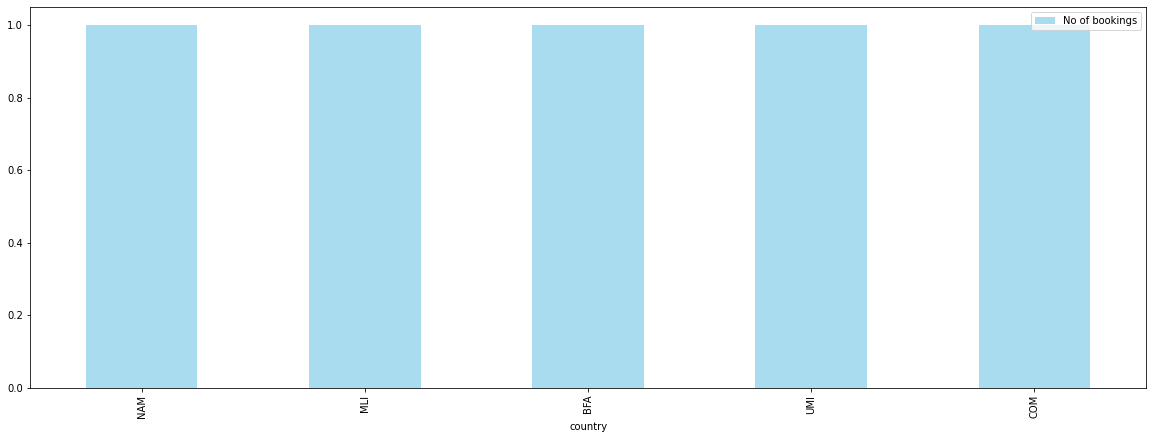

In [131]:
# Now we plot bottom  5 ountries from where  minimum people visit to a resort hotel
city_hotel_country_df[-5:].plot(x='country',y='No of bookings',kind='bar',color=('skyblue'),alpha=0.7)

**Conclusion**

We have plotted top and bottom 5 countries who has maximum and minimum contribution respectively .

Surprisingly,PRT- Purtugal has the highest contribution both the hotels. However,for the second place ,each hotel has different contributor.



# **Analysis of Room type**




For any hotel management ,it is very important to know that " What is the demand of the room and how much demand they are able to fulfill ? "

This is a very critical analysis as this is a concern of "Customer Satisfaction".

In [132]:
hotel_df.head()
# Extracting data of reserved room type  and the room assigned in a data frame.
reservation_and_assigned_df = hotel_df[["reserved_room_type",	"assigned_room_type"]]



In [133]:
reservation_and_assigned_df.head()

,reserved_room_type,assigned_room_type
3,A,A
4,A,A
5,A,A
7,C,C
8,A,A


In [134]:
# creating a dictionary with room type as key and number of bookings of that room type as its value.
reservation_dict = dict(reservation_and_assigned_df.reserved_room_type.value_counts())

# Converting the above dictionary to a dataframe.
reservation_df= pd.DataFrame({'Room type':reservation_dict.keys(),'No of bookings':reservation_dict.values()})








In [135]:
reservation_dict

{'A': 73265,
 'D': 17535,
 'E': 5457,
 'F': 2537,
 'G': 1809,
 'B': 992,
 'C': 765,
 'H': 534}

In [136]:
reservation_df.head()

,Room type,No of bookings
0,A,73265
1,D,17535
2,E,5457
3,F,2537
4,G,1809


Text(0.5, 1.0, 'Demand of different Room types')

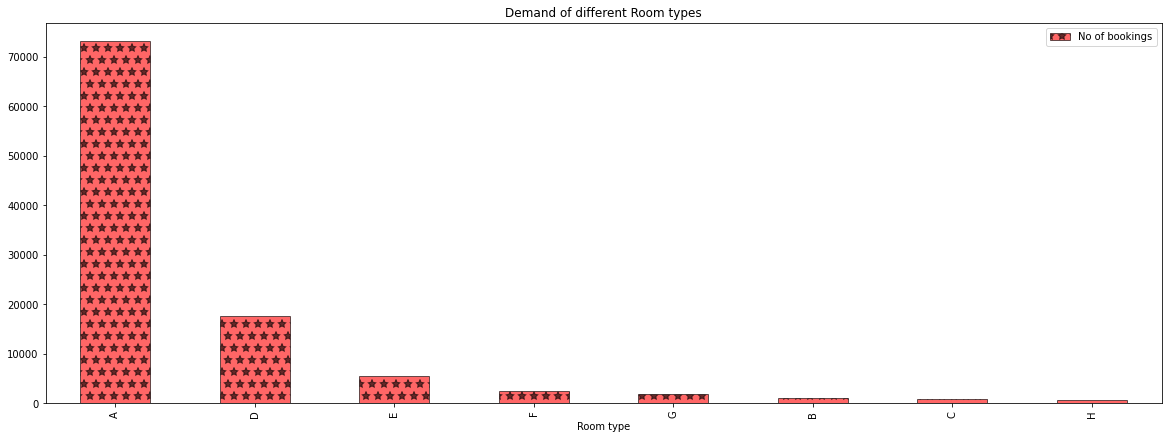

In [137]:
# Plotting room type v/s no of bookings.
plt.rcParams['figure.figsize'] = (20,7)
reservation_df.plot(x='Room type',y='No of bookings',kind = 'bar',color='red',edgecolor='black',alpha=0.6,hatch="*")
plt.title('Demand of different Room types')

**Observation**


Demand of **type - A** room is **highest** followed by type - D room .

In [138]:

# Making a dataframe under condition reserved room and assigned room is same
assigned_room_same_as_reserved_df = reservation_and_assigned_df.loc[reservation_and_assigned_df['reserved_room_type'] == reservation_and_assigned_df['assigned_room_type']]



In [139]:
assigned_room_same_as_reserved_df.head()

,reserved_room_type,assigned_room_type
3,A,A
4,A,A
5,A,A
7,C,C
8,A,A


In [140]:
# Creating a dictionary with assigned room type as key and number of bookings of that room type as its value.
assigned_dict = dict(assigned_room_same_as_reserved_df.assigned_room_type.value_counts())

# Converting the above dictionary to a dataframe.
assigned_df= pd.DataFrame({'Room type':assigned_dict.keys(),'No of bookings':assigned_dict.values()})


In [141]:
assigned_df.head()

,Room type,No of bookings
0,A,64118
1,D,16291
2,E,4983
3,F,2376
4,G,1775


In [142]:
# Merging reservation_df and assigned_df dataframes in one Dataframe using left join().
merged_resereservation_and_assigned_count_df = pd.merge(reservation_df, assigned_df, how='left',left_on='Room type',right_on='Room type')




In [143]:
merged_resereservation_and_assigned_count_df.head()

,Room type,No of bookings_x,No of bookings_y
0,A,73265,64118
1,D,17535,16291
2,E,5457,4983
3,F,2537,2376
4,G,1809,1775


In [144]:
# Changing the columns name.

merged_resereservation_and_assigned_count_df.rename(columns = {'No of bookings_x':'reservation numbers'}, inplace = True)
merged_resereservation_and_assigned_count_df.rename(columns = {'No of bookings_y':'assigned numbers'}, inplace = True)



In [145]:
# Adding a column to the dataframe which has percentage confirmation of booking in it.
merged_resereservation_and_assigned_count_df['percentage confirmation of booking'] =(merged_resereservation_and_assigned_count_df['assigned numbers']/merged_resereservation_and_assigned_count_df['reservation numbers'])*100


In [146]:
merged_resereservation_and_assigned_count_df.head()

,Room type,reservation numbers,assigned numbers,percentage confirmation of booking
0,A,73265,64118,87.515185
1,D,17535,16291,92.905617
2,E,5457,4983,91.313909
3,F,2537,2376,93.653922
4,G,1809,1775,98.120509


Text(0.5, 1.0, 'Room reserved VS Room assigned')

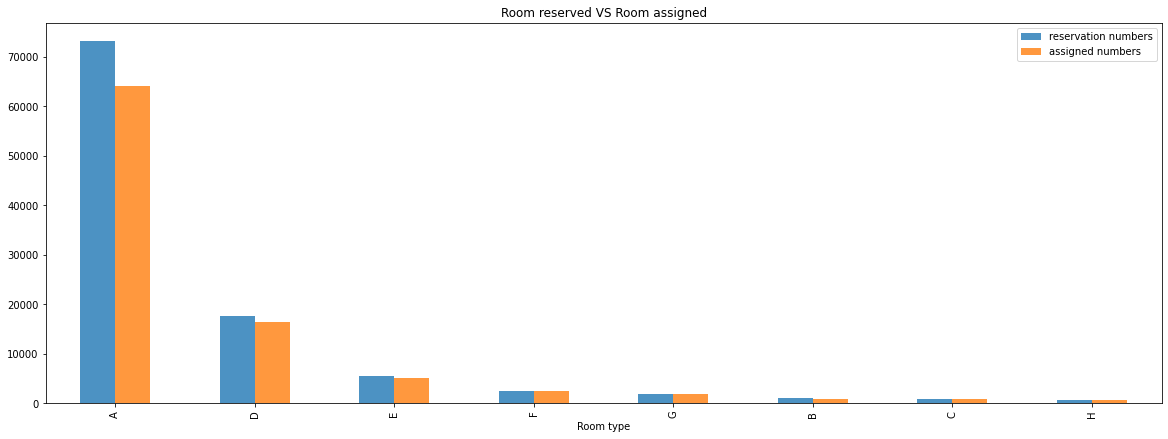

In [147]:
# plotting reserved room vs assigned
plt.rcParams['figure.figsize'] = (20,7)
merged_resereservation_and_assigned_count_df.plot(x = 'Room type' , y =['reservation numbers','assigned numbers'] , kind = 'bar',alpha=0.8)
plt.title('Room reserved VS Room assigned')

**Observation**

However demand of type A room is highest but the demand is not fulfilled properly as we can see a visible gap in deamnded numbers and assigned numbers.

Hotel management should look into it seriously.

Text(0.5, 1.0, 'Percentage of confirmed booking for various rooms type')

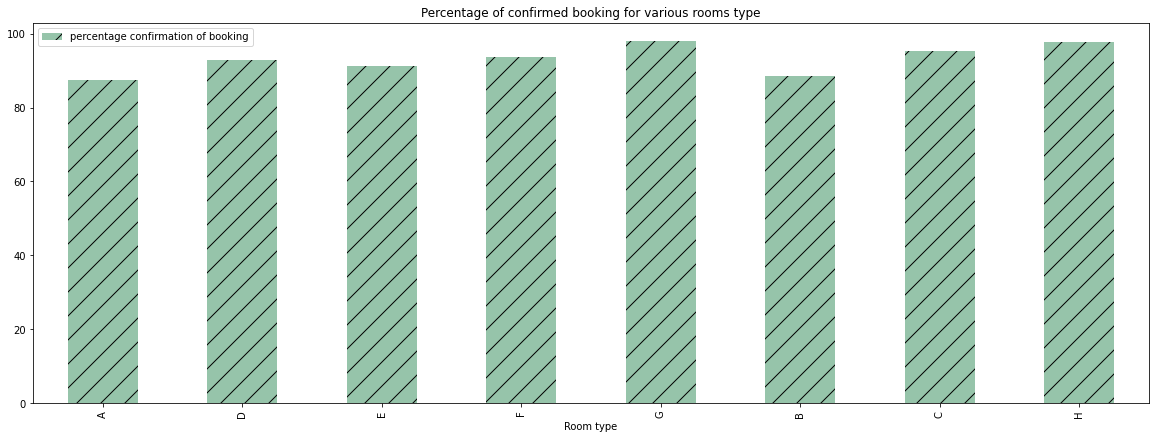

In [148]:
# plotting percentage confirmation of a booking room type.
plt.rcParams['figure.figsize'] = (20,7)

merged_resereservation_and_assigned_count_df.plot(x = 'Room type' , y ='percentage confirmation of booking' , kind = 'bar',color='seagreen',alpha=0.5,hatch="/")
plt.title('Percentage of confirmed booking for various rooms type')


**Observation**

From costumer perspective,

if they book type G or H type of room,

there are high chances they will be assigned room of their choice.

# **Car parking space requirement analysis**

In this block ,

we are going to analyze requirement of car parking spaces.

## 1. For city hotel

In [149]:
df_car_parking = hotel_df.groupby(['hotel','required_car_parking_spaces'])['required_car_parking_spaces'].count().reset_index(name='no_of_orders')


In [150]:
df_car_parking.head(10)

,hotel,required_car_parking_spaces,no_of_orders
0,City Hotel,0,69704
1,City Hotel,1,1472
2,City Hotel,2,3
3,City Hotel,3,2
4,Resort Hotel,0,27759
5,Resort Hotel,1,3936
6,Resort Hotel,2,17
7,Resort Hotel,3,1


In [151]:
car_parking_city_hotel = df_car_parking.loc[ (df_car_parking["hotel"] == "City Hotel") ,["required_car_parking_spaces", "no_of_orders"]]

In [152]:
car_parking_city_hotel.head()

,required_car_parking_spaces,no_of_orders
0,0,69704
1,1,1472
2,2,3
3,3,2


In [153]:
total = car_parking_city_hotel['no_of_orders'].sum()
total

71181

In [154]:
# compute percenatage of each format

percentage = []
for i in range(car_parking_city_hotel.shape[0]):
    pct = (car_parking_city_hotel.no_of_orders[i] / total) * 100
    percentage.append(round(pct,5))
car_parking_city_hotel['Percentage'] = percentage

In [155]:
car_parking_city_hotel.head()

,required_car_parking_spaces,no_of_orders,Percentage
0,0,69704,97.92501
1,1,1472,2.06797
2,2,3,0.00421
3,3,2,0.00281


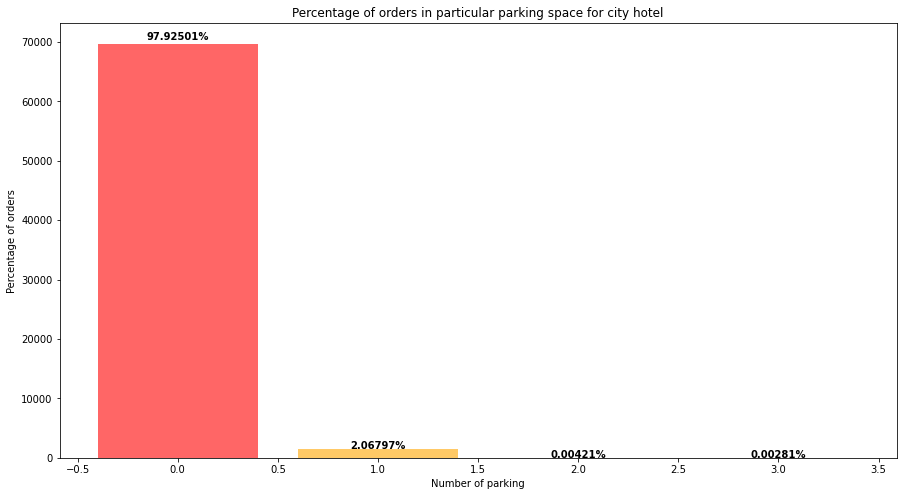

In [156]:
# depict illustration
plt.figure(figsize=(15,8))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(car_parking_city_hotel.required_car_parking_spaces,car_parking_city_hotel.no_of_orders, color = colors_list, alpha=0.6)
plt.title('Percentage of orders in particular parking space for city hotel')
plt.xlabel("Number of parking")
plt.ylabel("Percentage of orders")
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(car_parking_city_hotel.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

## 2. For resort hotel

In [157]:
car_parking_resort_hotel = df_car_parking.loc[ (df_car_parking["hotel"] == "Resort Hotel") ,["required_car_parking_spaces", "no_of_orders"]]

In [158]:
car_parking_resort_hotel.reset_index(inplace=True)

In [159]:
car_parking_resort_hotel.head()

,index,required_car_parking_spaces,no_of_orders
0,4,0,27759
1,5,1,3936
2,6,2,17
3,7,3,1


In [160]:
total_1 = car_parking_resort_hotel['no_of_orders'].sum()
total_1

31713

In [161]:
car_parking_resort_hotel.no_of_orders[1]

3936

In [162]:
percentage_1 = []
for i in range(car_parking_resort_hotel.shape[0]):
  pct = (car_parking_resort_hotel.no_of_orders[i] / total_1) * 100
  percentage_1.append(round(pct,5))
car_parking_resort_hotel['Percentage'] = percentage_1

In [163]:
car_parking_resort_hotel

,index,required_car_parking_spaces,no_of_orders,Percentage
0,4,0,27759,87.53193
1,5,1,3936,12.41131
2,6,2,17,0.05361
3,7,3,1,0.00315


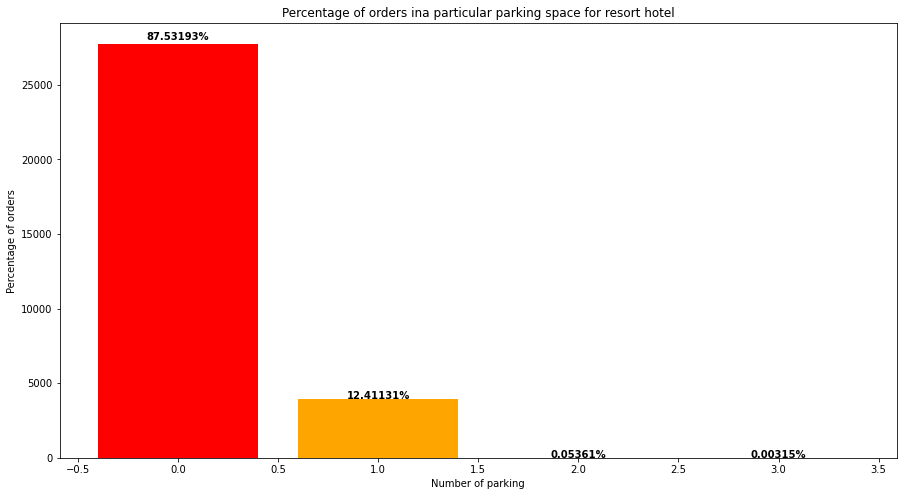

In [165]:
# depict illustration
plt.figure(figsize=(15,8))
colors_list = ['Red','Orange', 'Blue', 'Purple']
graph = plt.bar(car_parking_resort_hotel.required_car_parking_spaces,car_parking_resort_hotel.no_of_orders, color = colors_list)
plt.title('Percentage of orders ina particular parking space for resort hotel')
plt.xlabel("Number of parking")
plt.ylabel("Percentage of orders")
i = 0
for p in graph:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height*1.01,
             str(car_parking_resort_hotel.Percentage[i])+'%',
             ha='center',
             weight='bold')
    i+=1
plt.show()

**Observation and Conclusion**

Seeing the above plots ,we can clearly say that in both the hotels,maximum customers don't require any parking spaces.However,there are some instances where customers require one parking space.

Thus,hotel management should prepare accordingly.

# **CONCLUSIONS**

* Comparing the magnitude of booking we see that city hotel has always scored higher booking counts.

* Number of booking start increasing from spring to summer season and then decrease till winter season.

* TA(travel agents) are the major contributors of booking

* The most number of cancelled booking is in the month of August.

* Adr starts decreasing from month of september and it gets its minimum value in between november and january, after that adr starts increasing and it gets its peak in august.

* BB is most preferred and FB is the least preferred meal.

* Demand of type A room is highest followed by type D room.